# General Description:

For CRDM

Plotting choice as a function of the lottery amount, subdivded by lottery probabilities and ambuguity levels.

Importing libraries and mounting Google Drive

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os,sys


In [69]:
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

In [70]:
def tabulate_col(fn,df,col='crdm_sure_amt'):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    print(count_df)
    #create .csv file with this info
    print("Saving to: {}".format(fn))
    count_df.to_csv(fn)

In [71]:
def count_lott_p_sure_amt_amb(fn_helper):
  df = pd.read_csv(fn_helper)
  #0's are now choosing immediate, 1 is choosing delay
  # df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  # get unique amounts that are "task" trials

  for col in ['crdm_sure_amt','crdm_amb_lev','crdm_lott_p','crdm_lott_amt']:
    fn = os.path.join('csv','{}.csv'.format(col))
    tabulate_col(fn,df,col=col)


In [72]:
def drop_blank(df):
    df_len = df.shape[0]
    df['responded'] = df['crdm_trial_resp.keys'].notna()
    if not df['responded'].all():
        non_responses_nb = df['responded'].value_counts()[False]
        print('\n**WARNING** We dropped {0} of {1} non responses that were left blank'.format(non_responses_nb,df_len))
        df = df.loc[df['responded'],:].reset_index(drop=True)    
    return df
        

In [73]:
# split dataframe by gains/losses
def get_by_domain(df,domain='gain',task='crdm',verbose='False'):
    if verbose:
        print('Working on this domain: {}'.format(domain))
    # select by domain: gain/loss
    domain_col = '{}_domain'.format(task)
    df = df.loc[df[domain_col]==domain]
    return df

In [74]:
def get_subject(fn):
  subj = os.path.basename(fn).replace('_crdm.csv','')
  return subj

In [75]:
split_dir = '/Volumes/UCDN/datasets/NIDA/split/'
utility_dir = '/Volumes/UCDN/datasets/NIDA/utility/'
fn_helper = os.path.join(split_dir,'NIDA_p001_s002/crdm/NIDA_p001_s002_crdm.csv')
count_lott_p_sure_amt_amb(fn_helper)

   crdm_sure_amt  count
0           -5.0     83
1            5.0     83
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0    106
1          24.0     21
2          50.0     21
3          74.0     18
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         13.0     22
1         25.0     21
2         38.0     21
3         50.0     82
4         75.0     20
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0          -50.0     15
1          -40.0     18
2          -20.0     16
3           -8.0     16
4           -5.0     18
5            5.0     17
6            8.0     16
7           20.0     18
8           40.0     18
9           50.0     14
Saving to: csv/crdm_lott_amt.csv


Use the results from above to define upper and lower bounds and ylabels and titles

/Volumes/UCDN/datasets/NIDA/split/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 8 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm_plot_lottery_amt_choice_gain.png


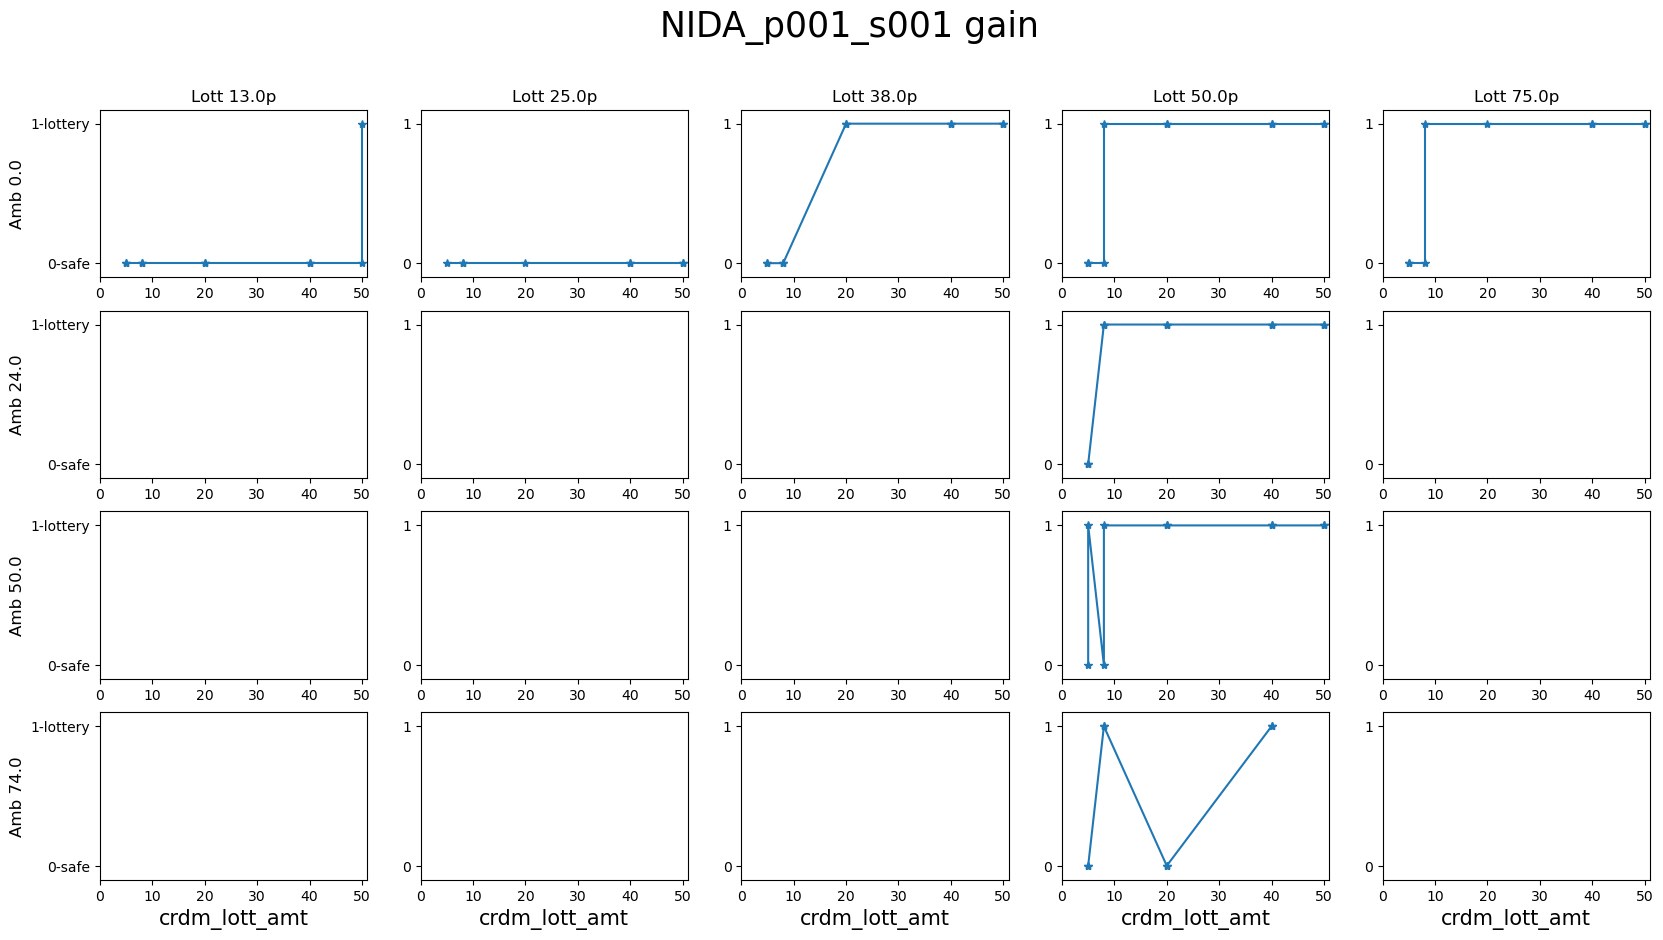

/Volumes/UCDN/datasets/NIDA/split/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 15 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm_plot_lottery_amt_choice_loss.png


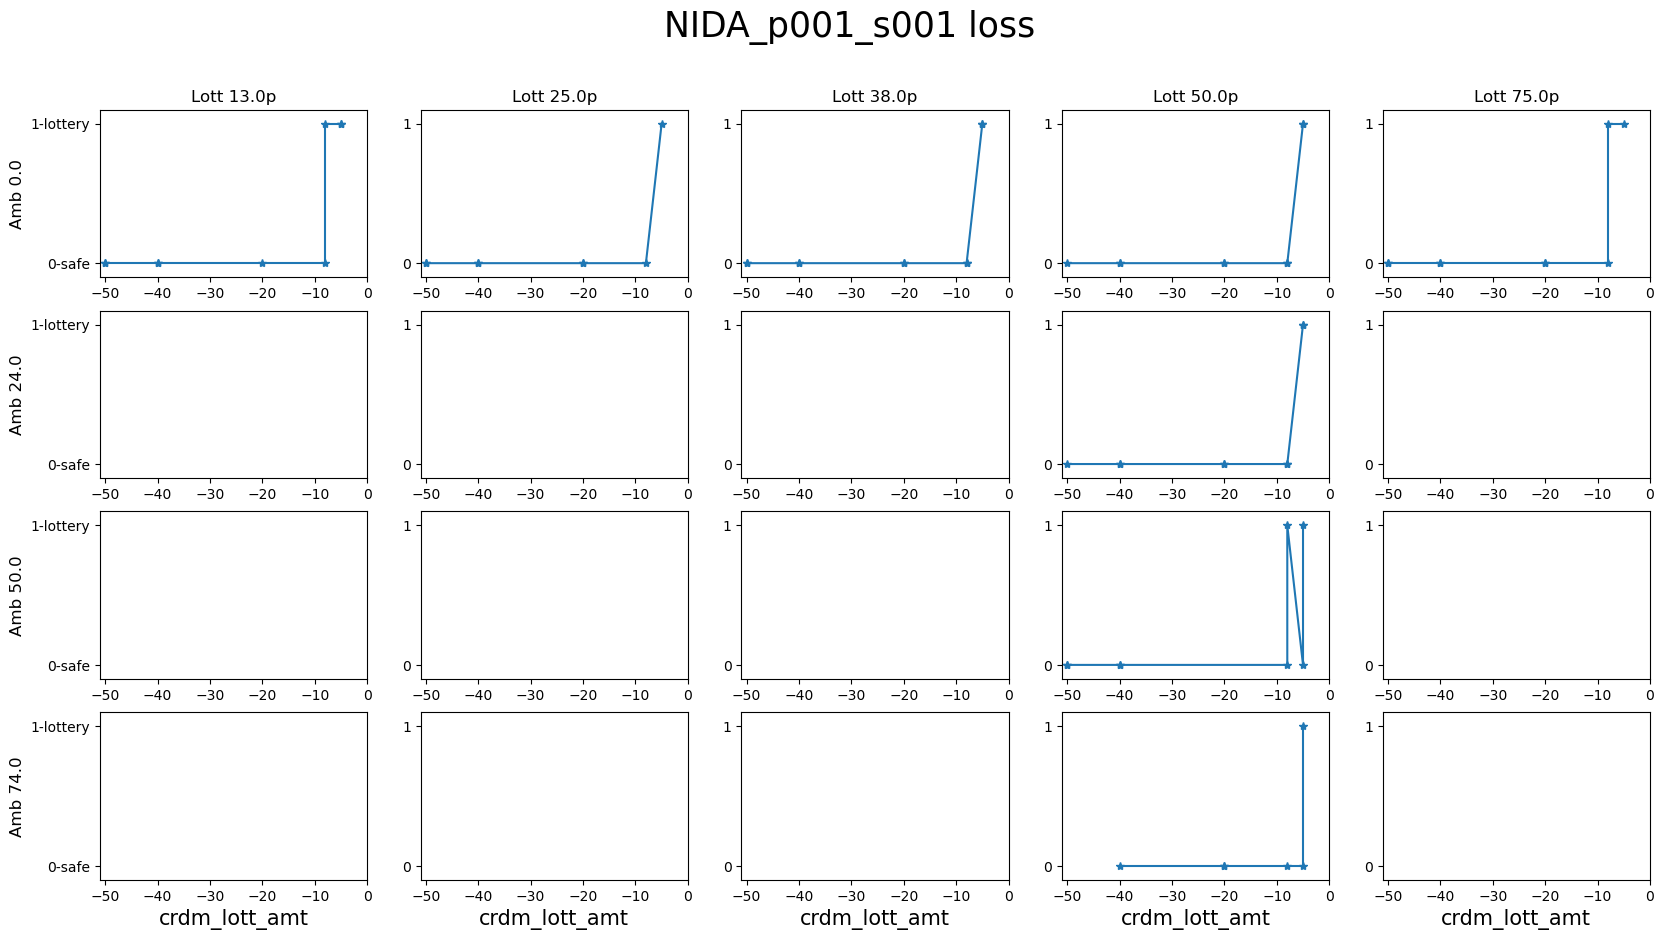

/Volumes/UCDN/datasets/NIDA/split/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm.csv

**WARNING** We dropped 26 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s001/crdm/NIDA_p001_s001_crdm_plot_lottery_amt_choice_combined.png


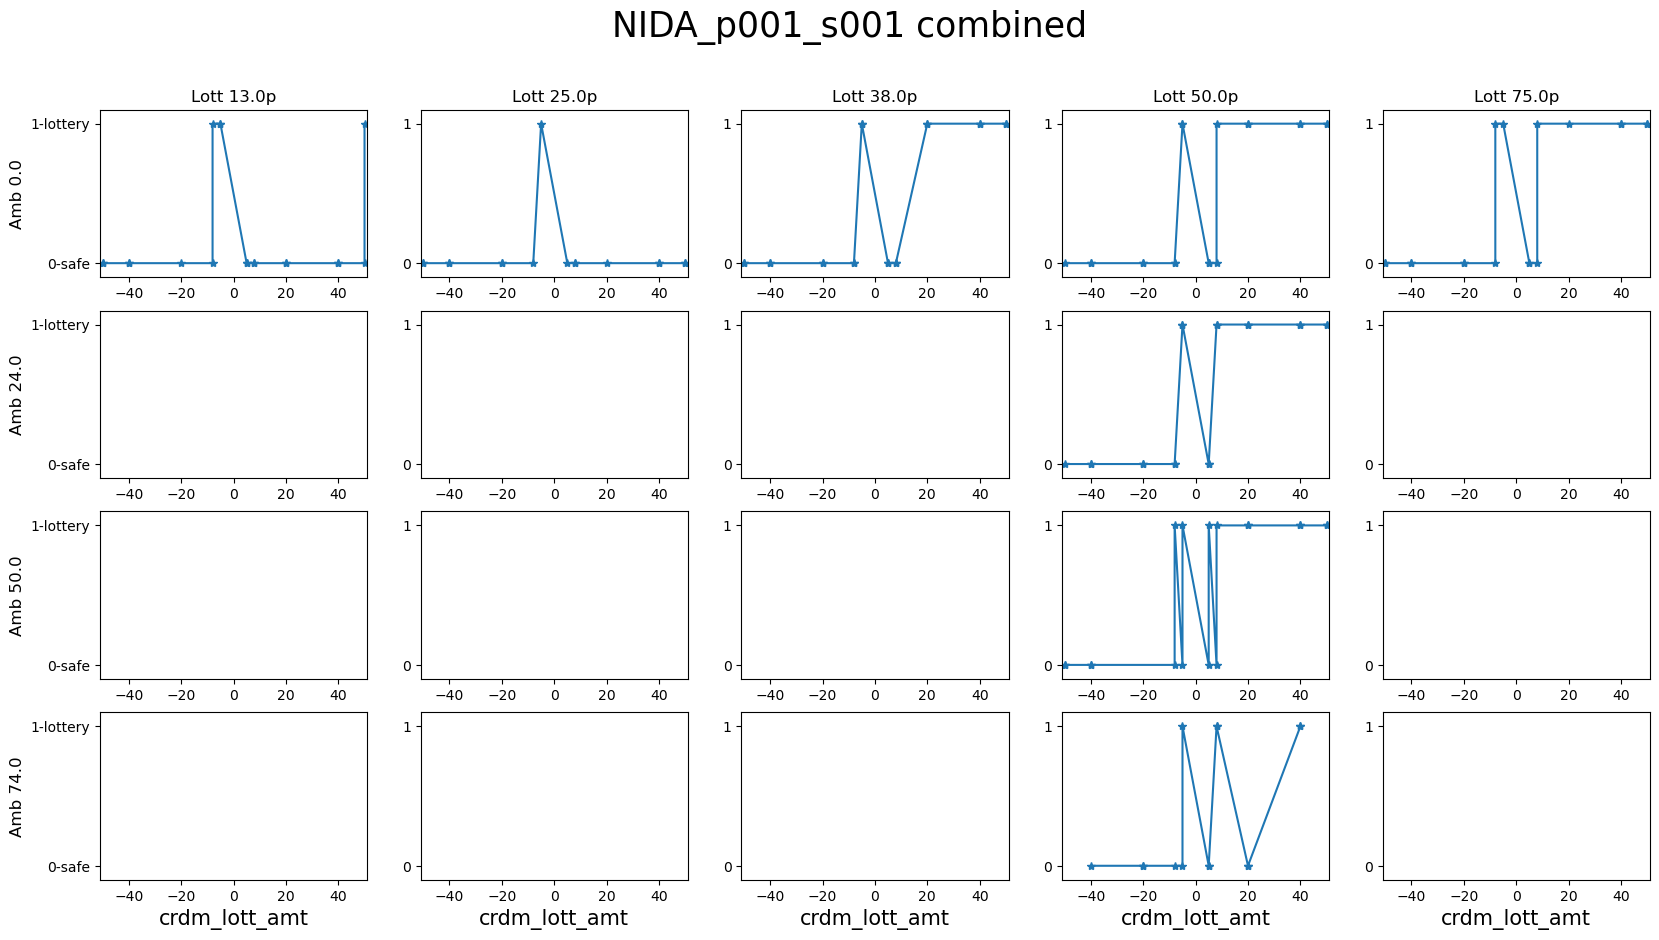

/Volumes/UCDN/datasets/NIDA/split/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm_plot_lottery_amt_choice_gain.png


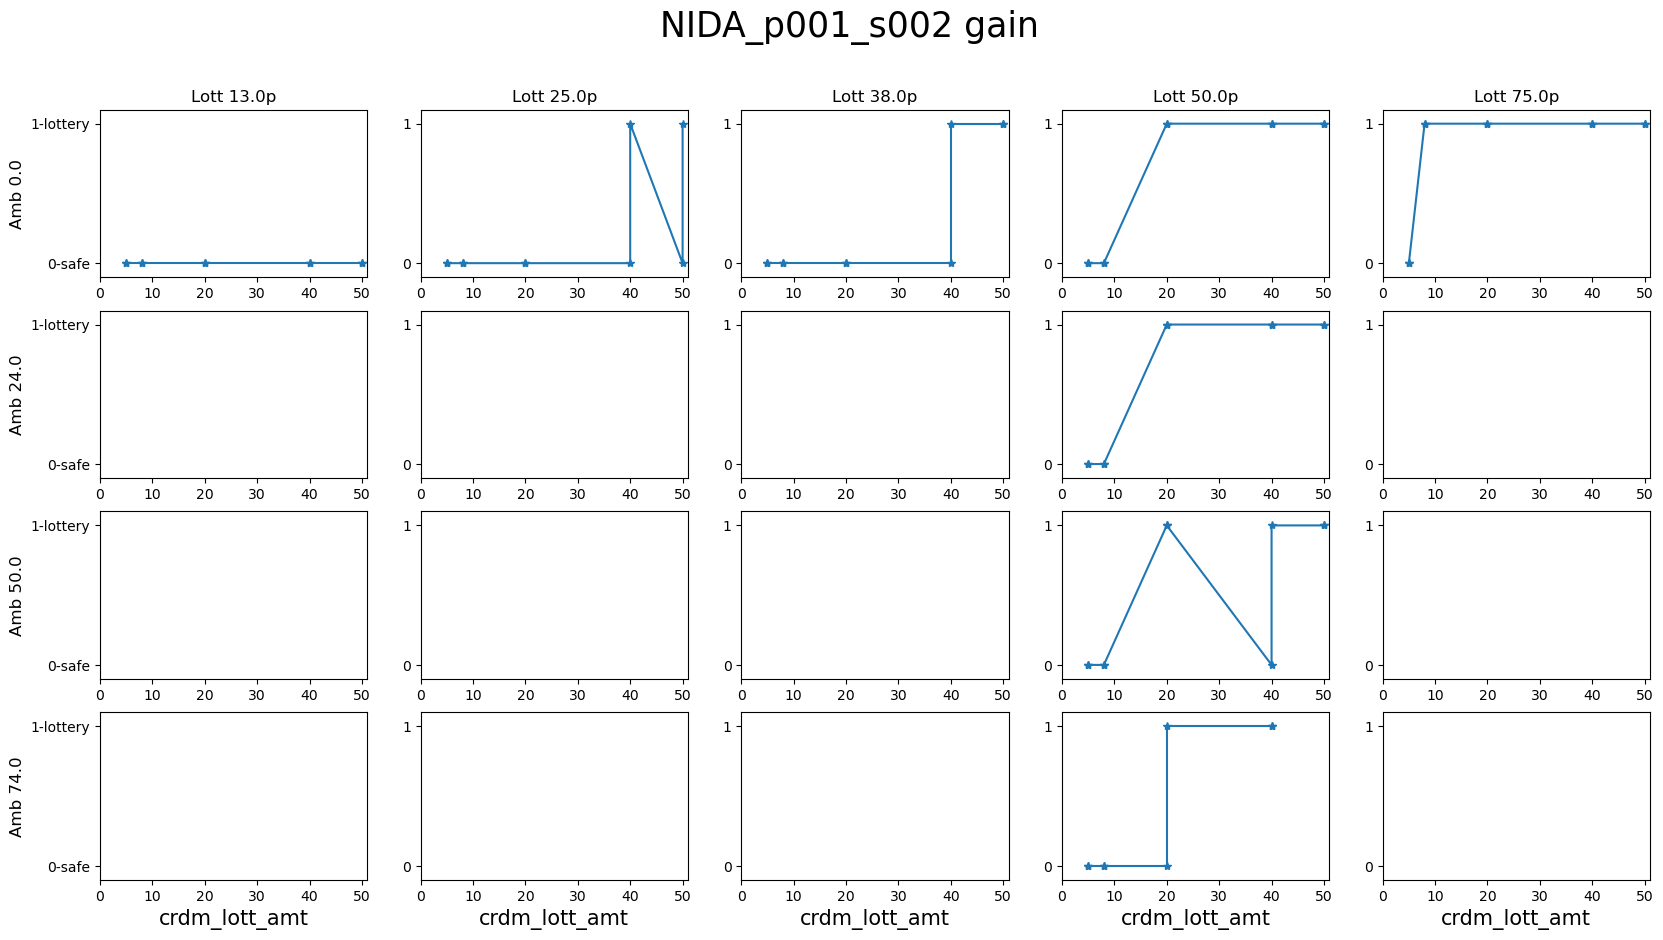

/Volumes/UCDN/datasets/NIDA/split/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm_plot_lottery_amt_choice_loss.png


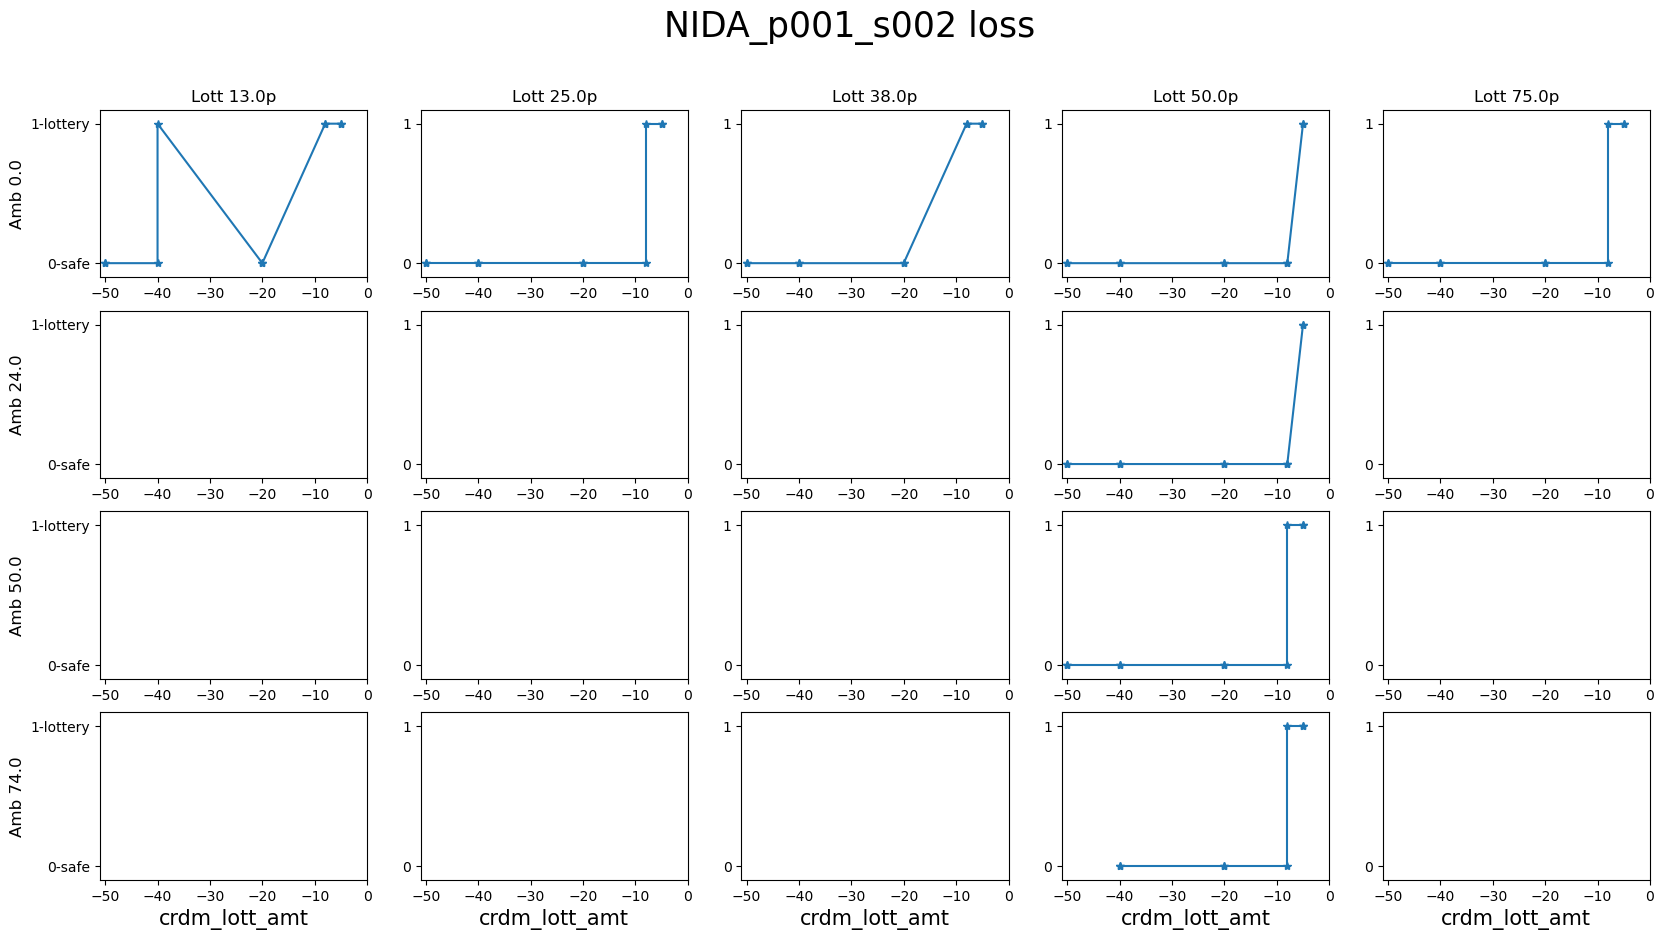

/Volumes/UCDN/datasets/NIDA/split/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm.csv

**WARNING** We dropped 13 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p001_s002/crdm/NIDA_p001_s002_crdm_plot_lottery_amt_choice_combined.png


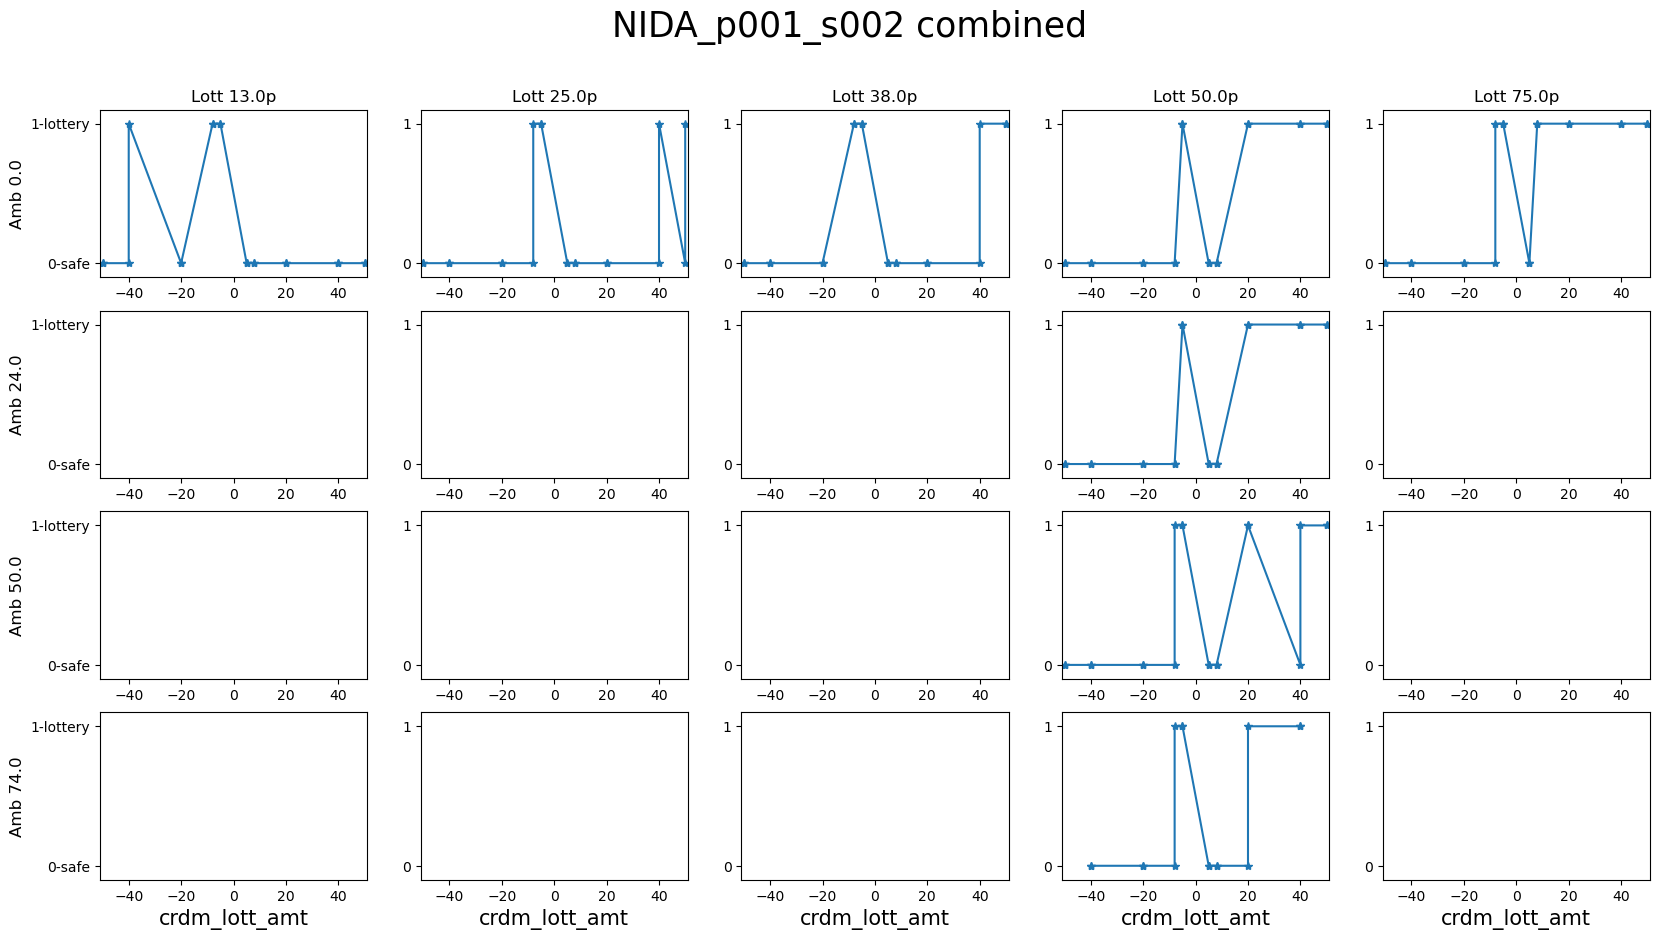

/Volumes/UCDN/datasets/NIDA/split/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 7 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm_plot_lottery_amt_choice_gain.png


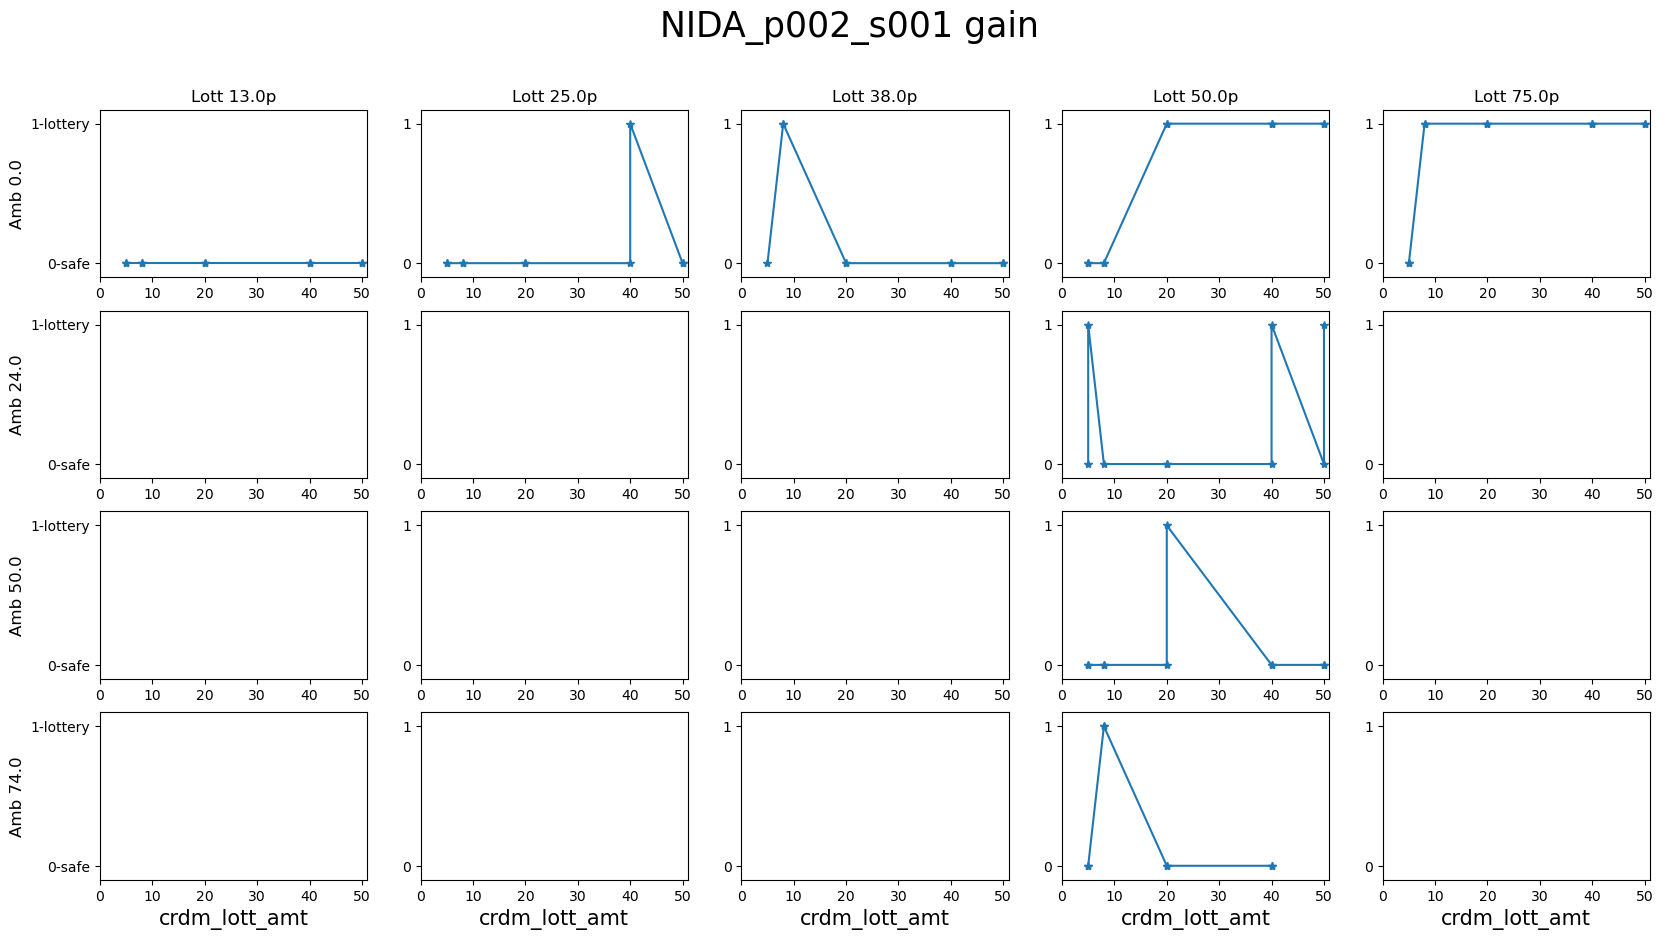

/Volumes/UCDN/datasets/NIDA/split/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 12 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm_plot_lottery_amt_choice_loss.png


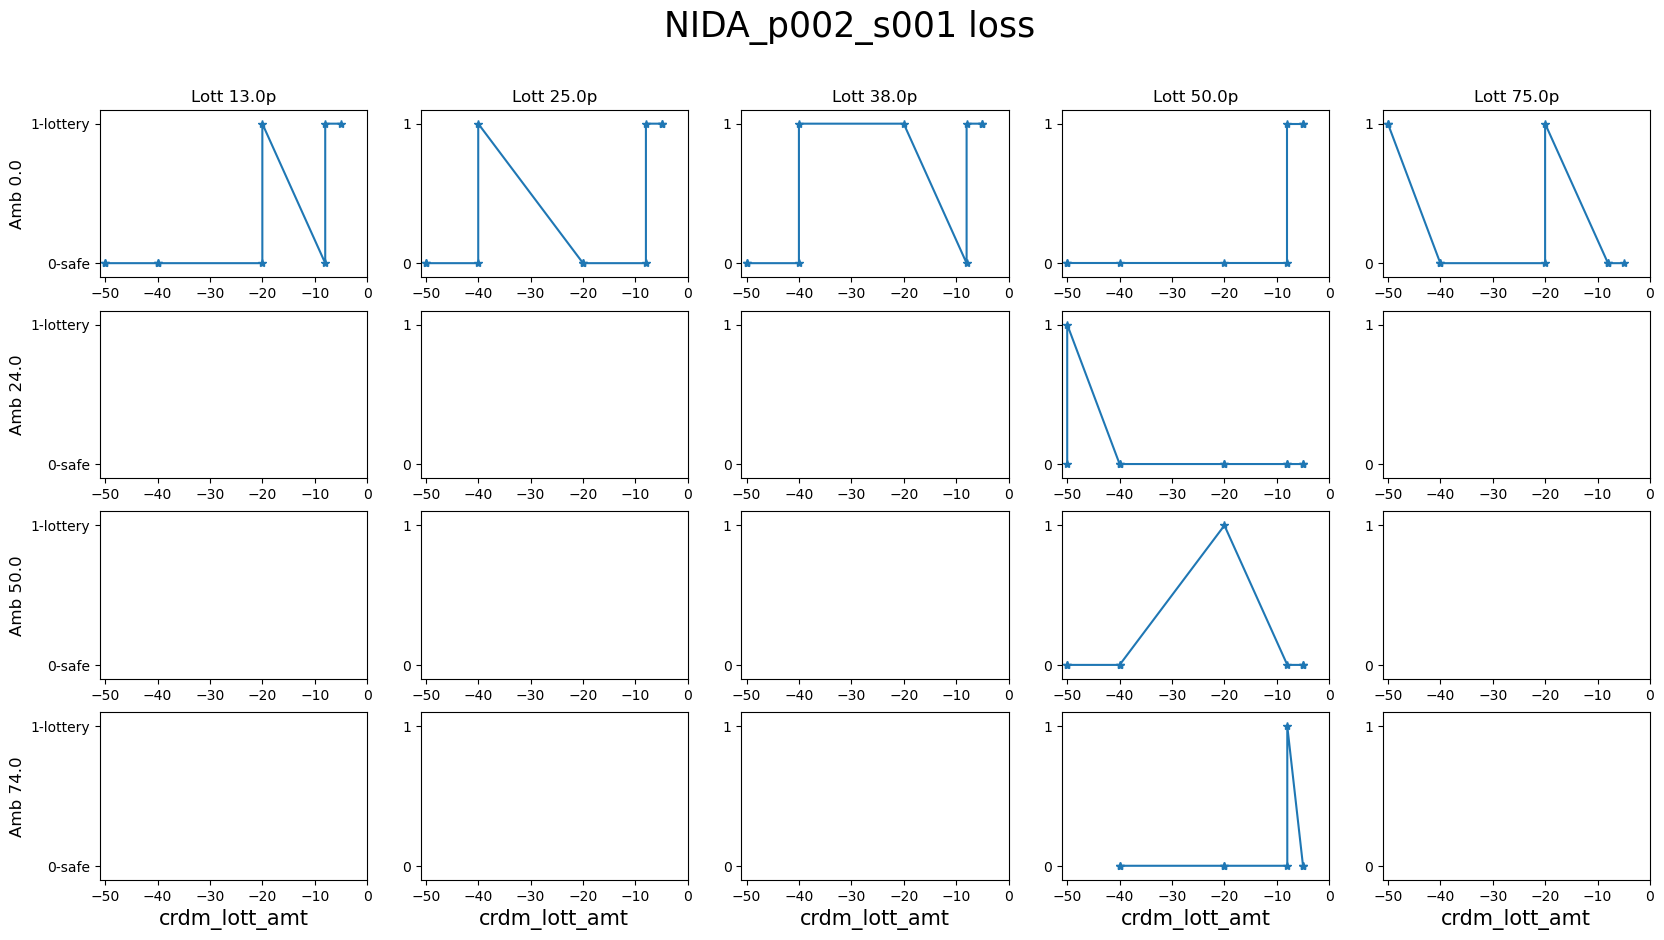

/Volumes/UCDN/datasets/NIDA/split/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm.csv

**WARNING** We dropped 22 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s001/crdm/NIDA_p002_s001_crdm_plot_lottery_amt_choice_combined.png


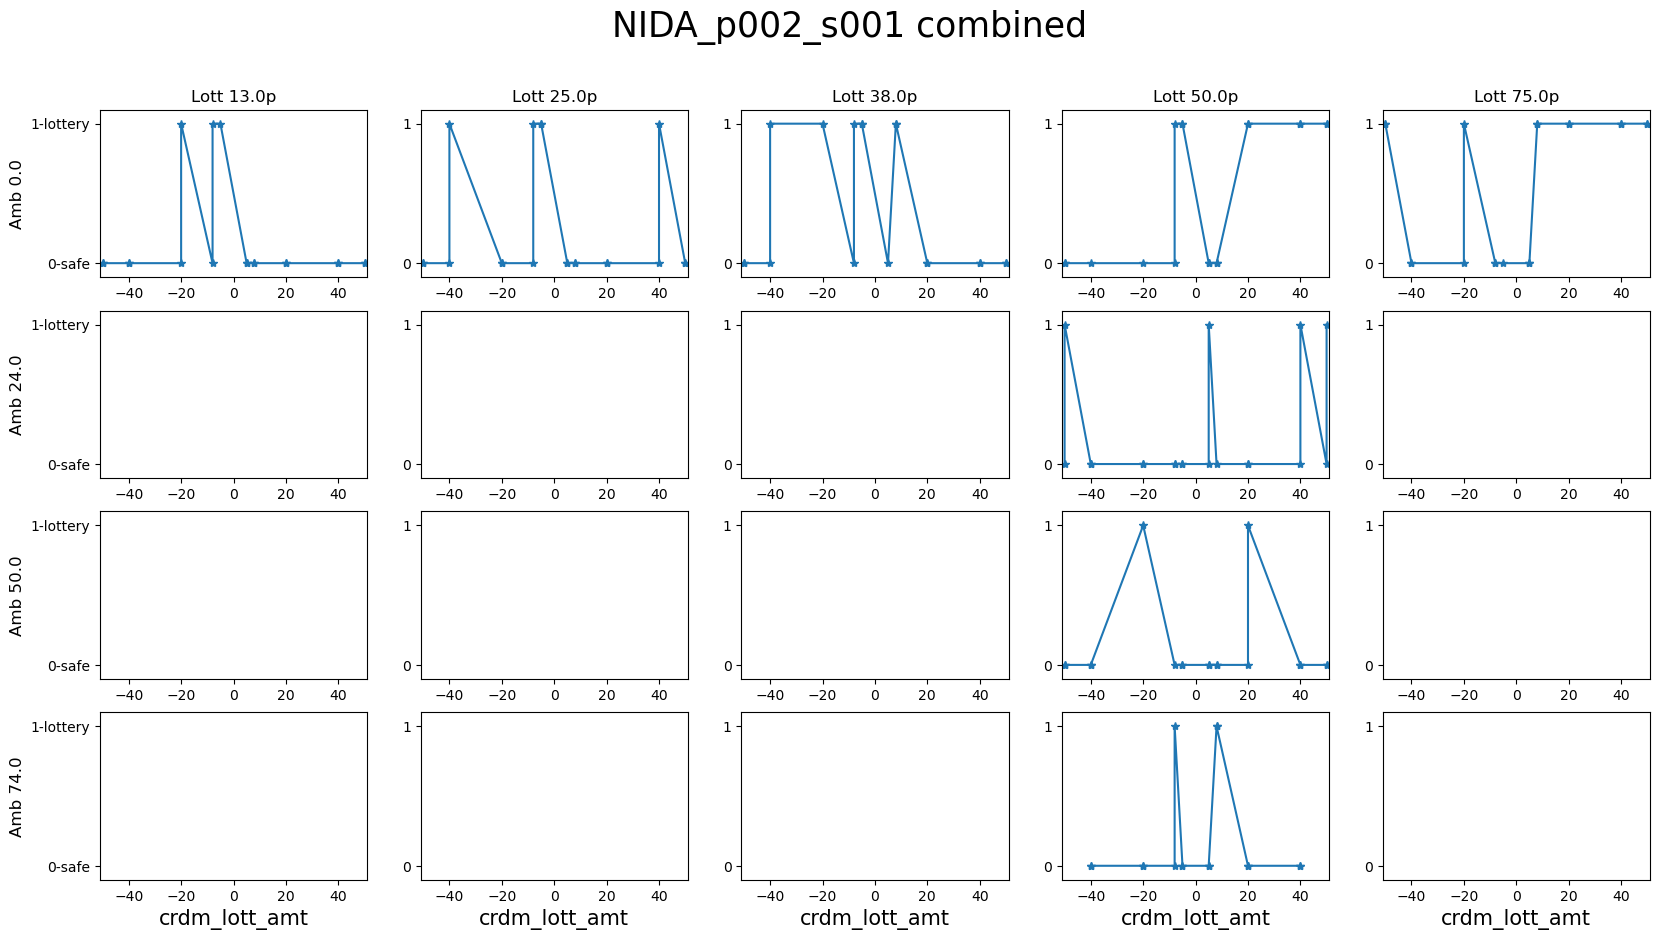

/Volumes/UCDN/datasets/NIDA/split/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 10 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm_plot_lottery_amt_choice_gain.png


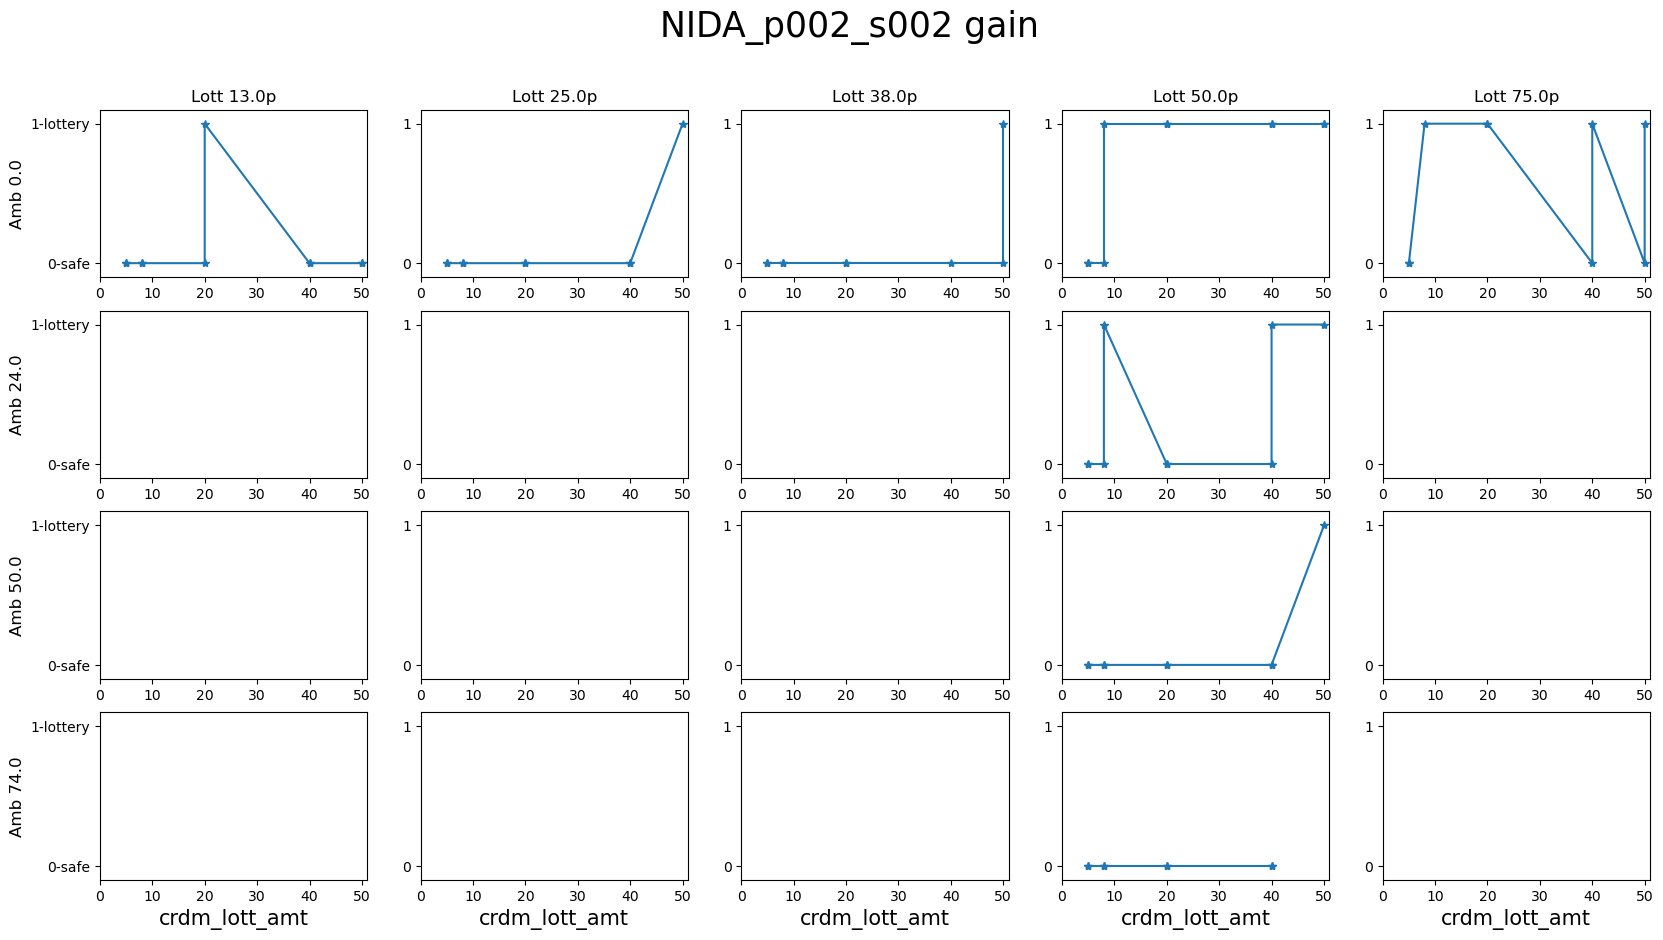

/Volumes/UCDN/datasets/NIDA/split/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 6 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm_plot_lottery_amt_choice_loss.png


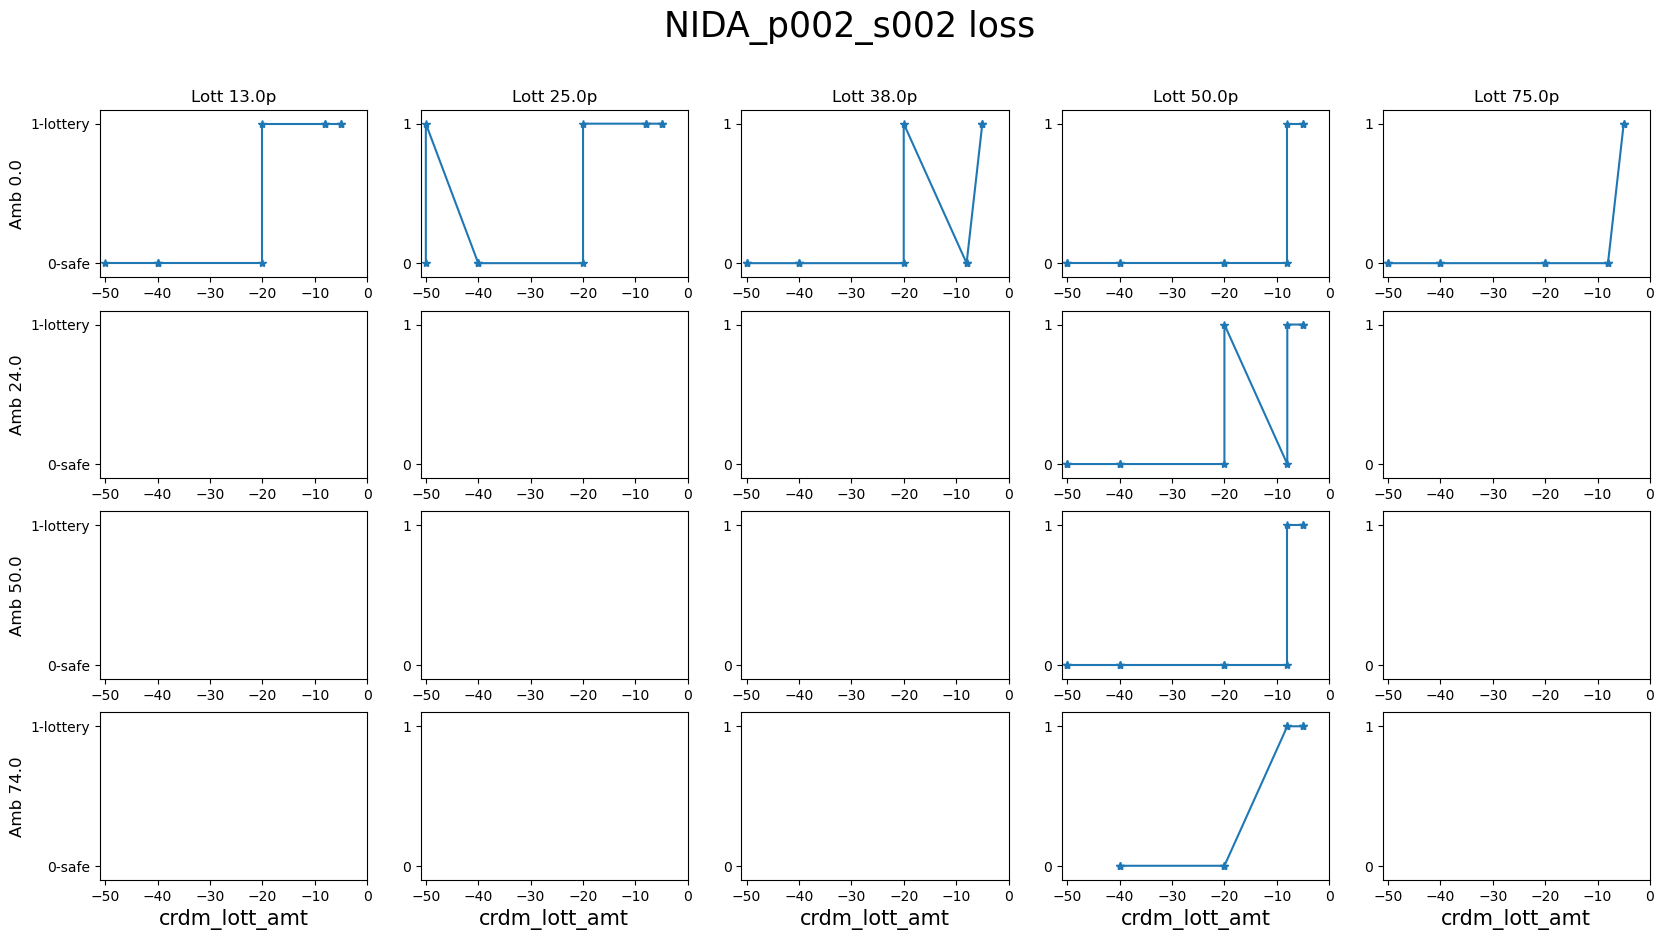

/Volumes/UCDN/datasets/NIDA/split/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm.csv

**WARNING** We dropped 19 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p002_s002/crdm/NIDA_p002_s002_crdm_plot_lottery_amt_choice_combined.png


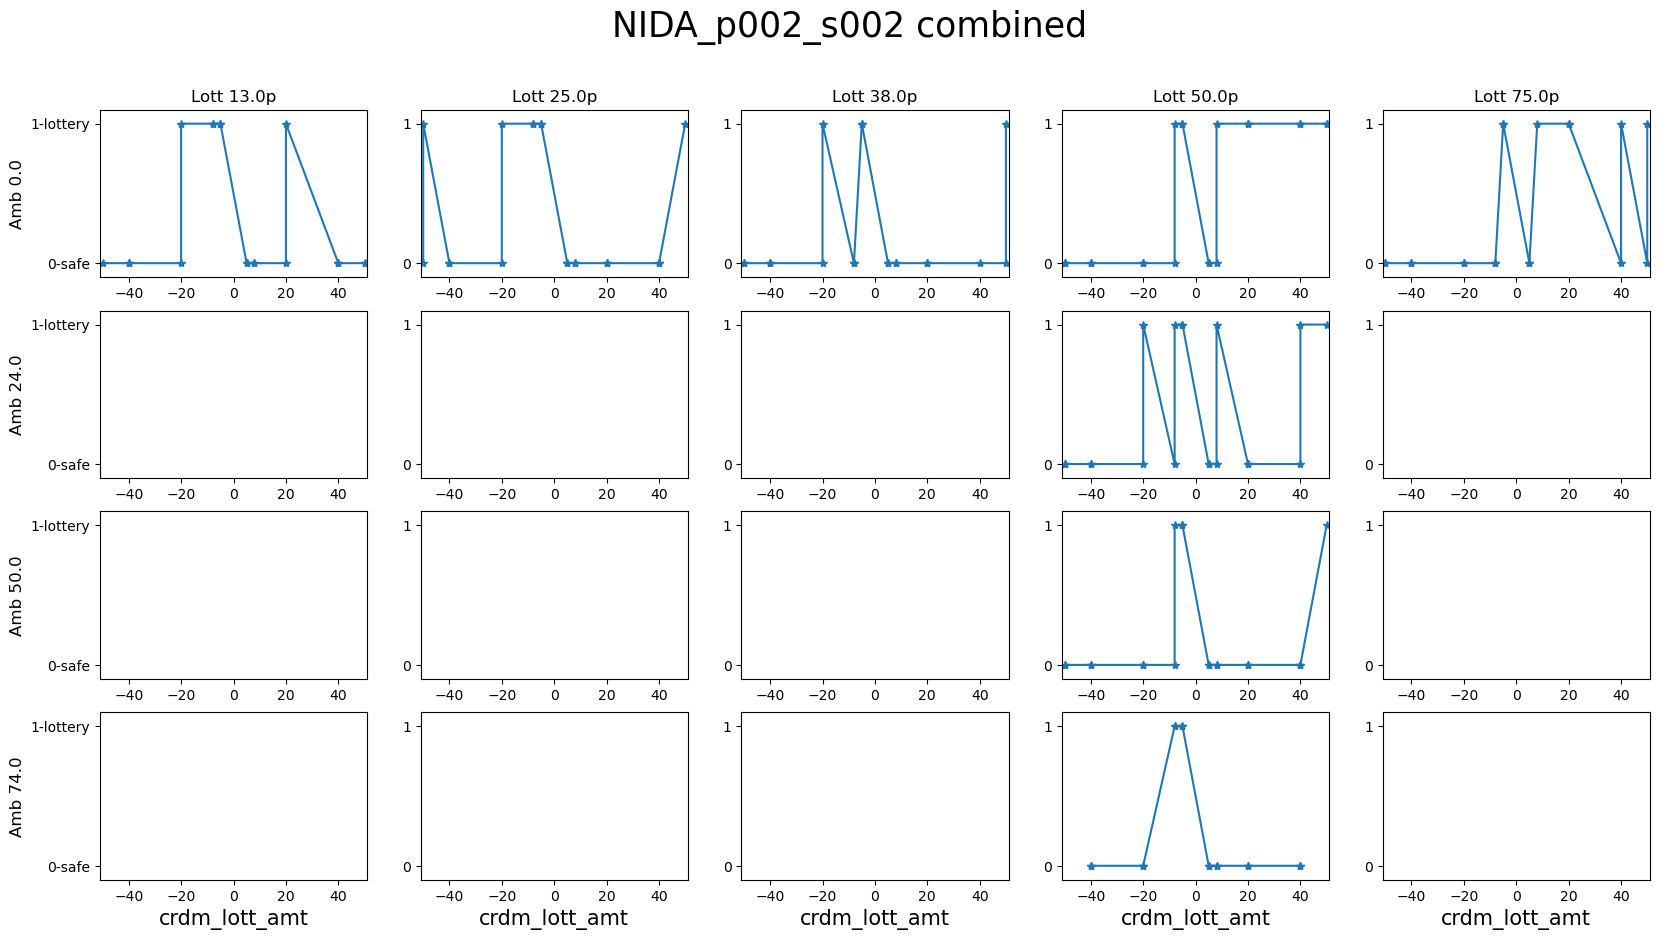

/Volumes/UCDN/datasets/NIDA/split/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 6 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm_plot_lottery_amt_choice_gain.png


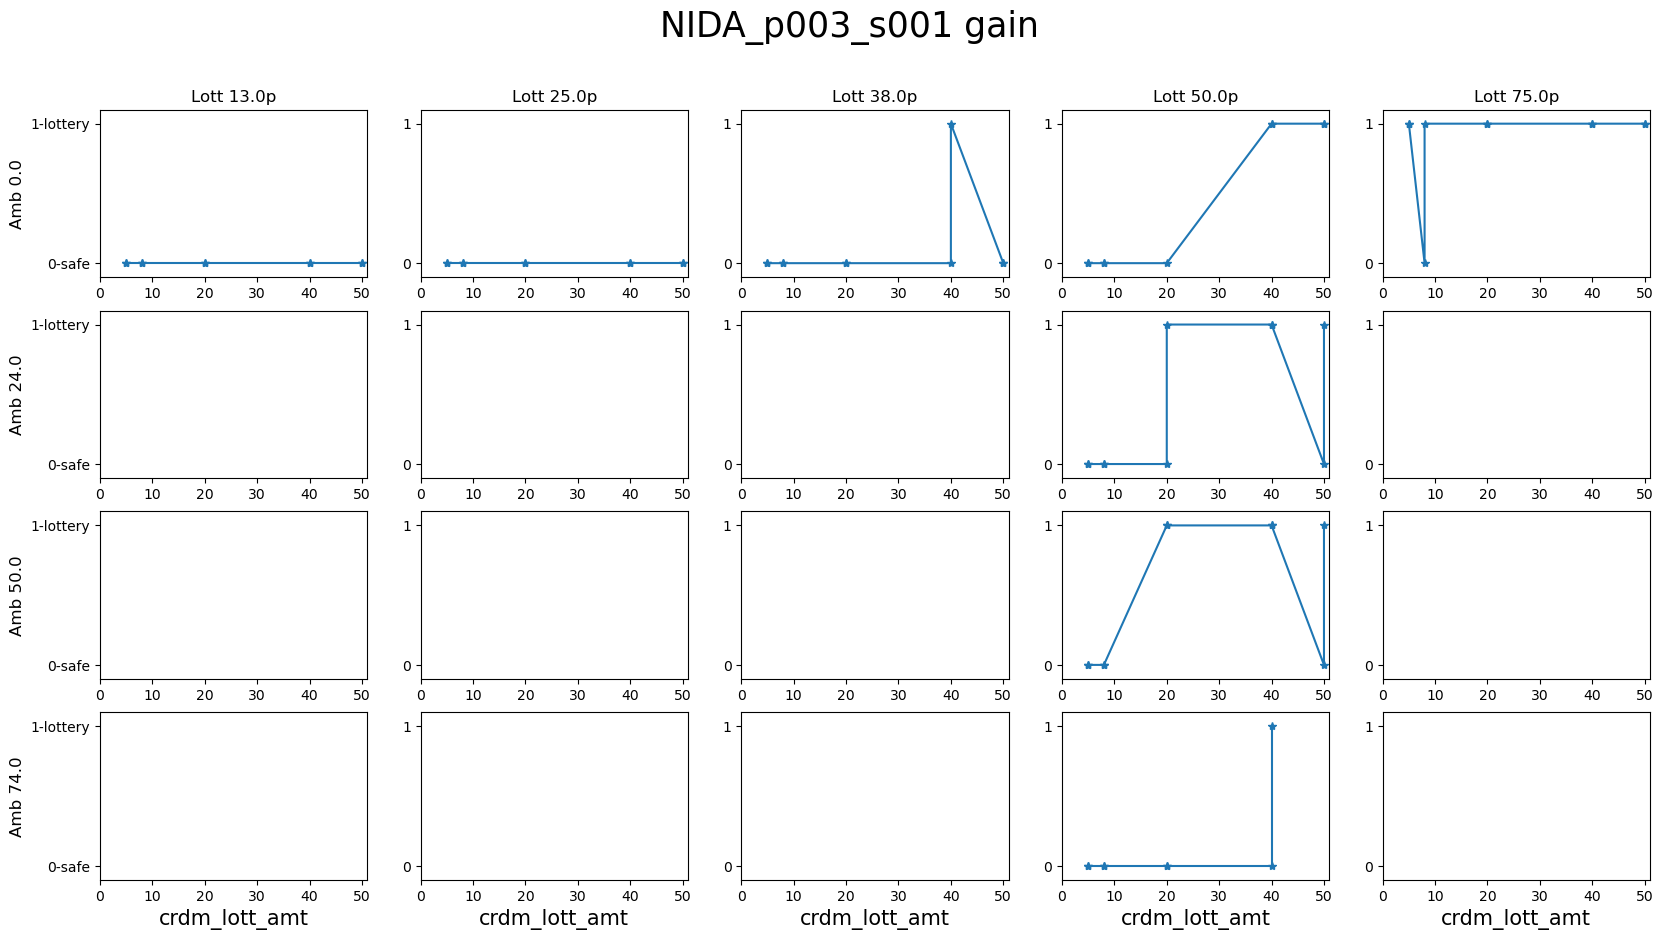

/Volumes/UCDN/datasets/NIDA/split/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm_plot_lottery_amt_choice_loss.png


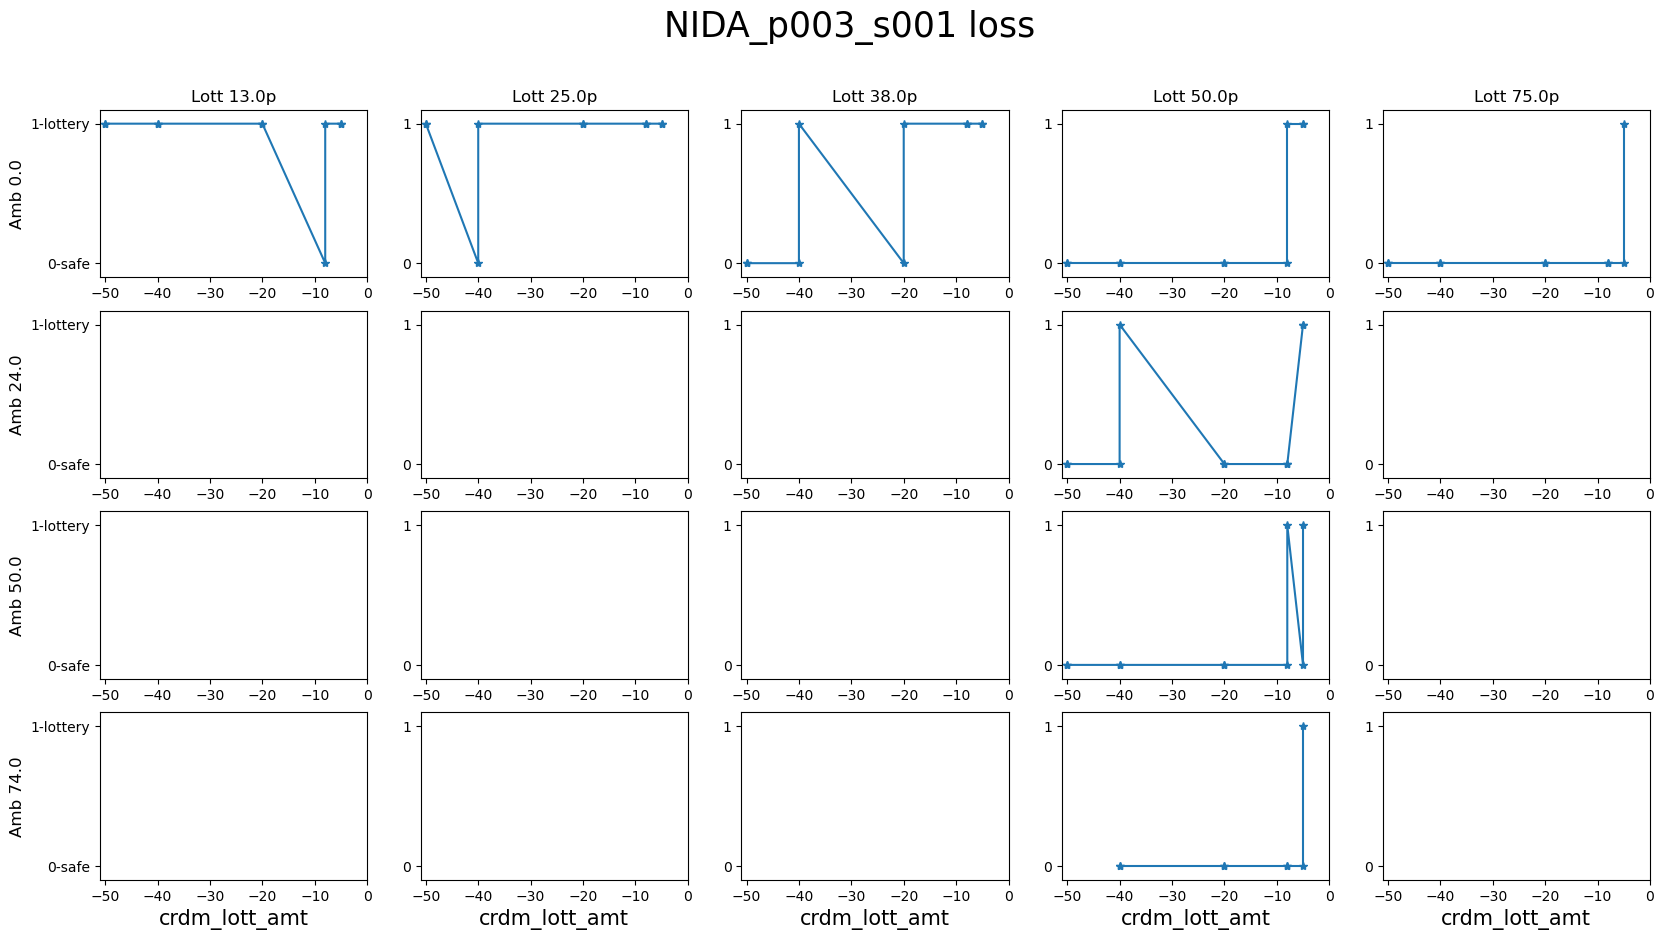

/Volumes/UCDN/datasets/NIDA/split/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm.csv

**WARNING** We dropped 14 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s001/crdm/NIDA_p003_s001_crdm_plot_lottery_amt_choice_combined.png


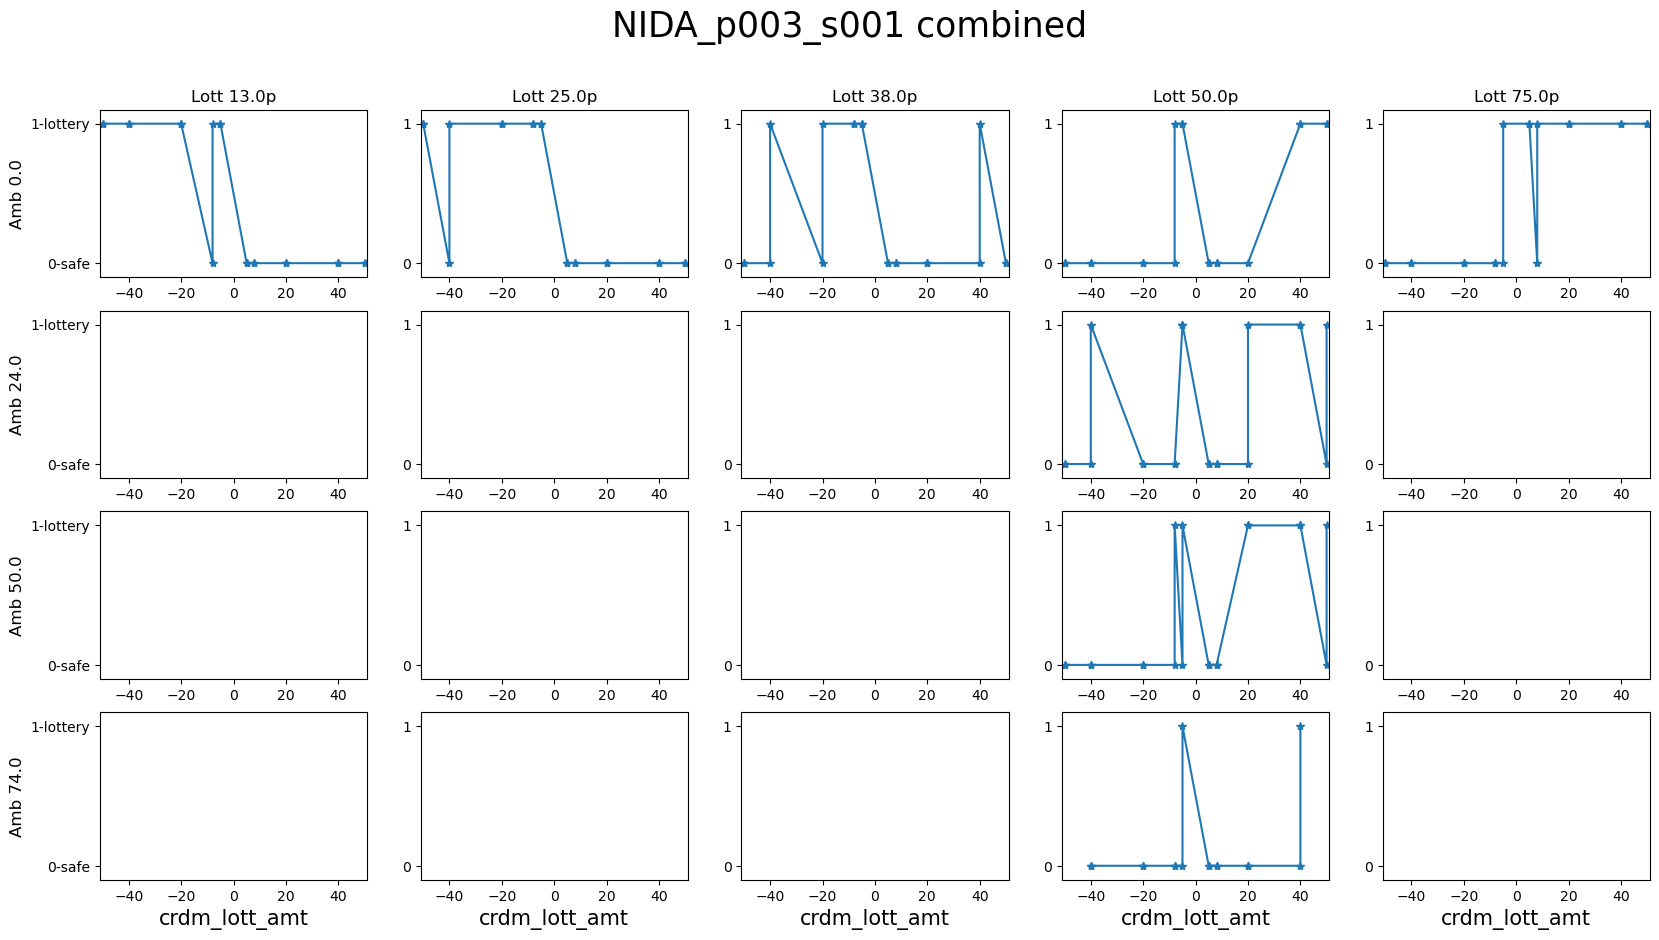

/Volumes/UCDN/datasets/NIDA/split/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm_plot_lottery_amt_choice_gain.png


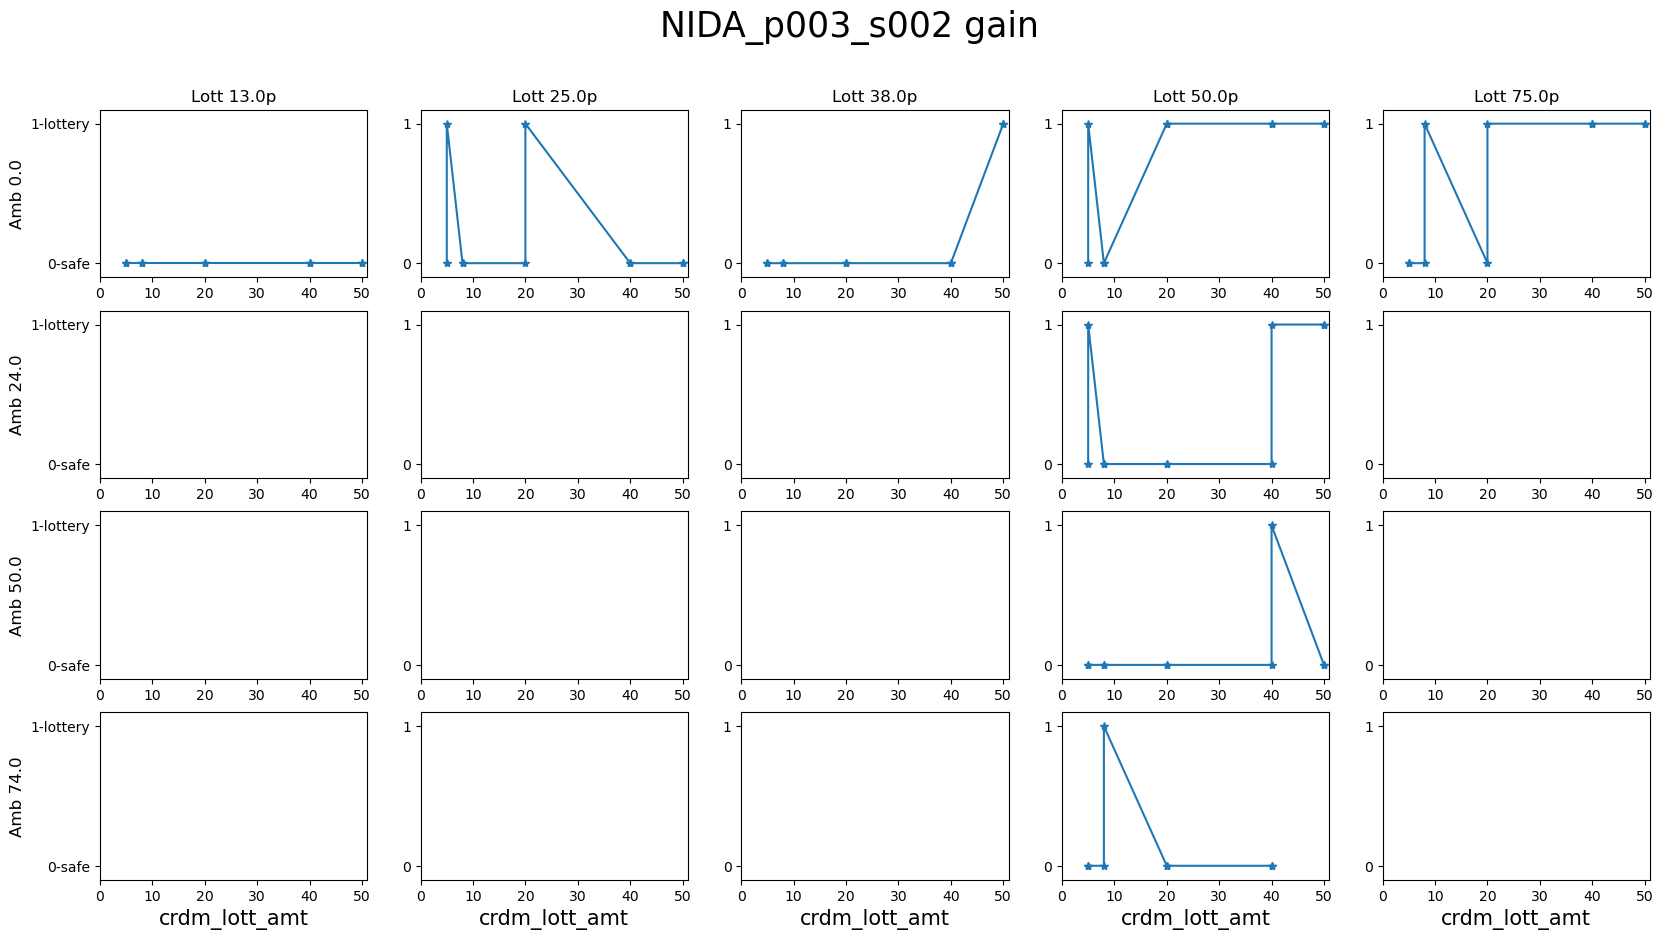

/Volumes/UCDN/datasets/NIDA/split/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm_plot_lottery_amt_choice_loss.png


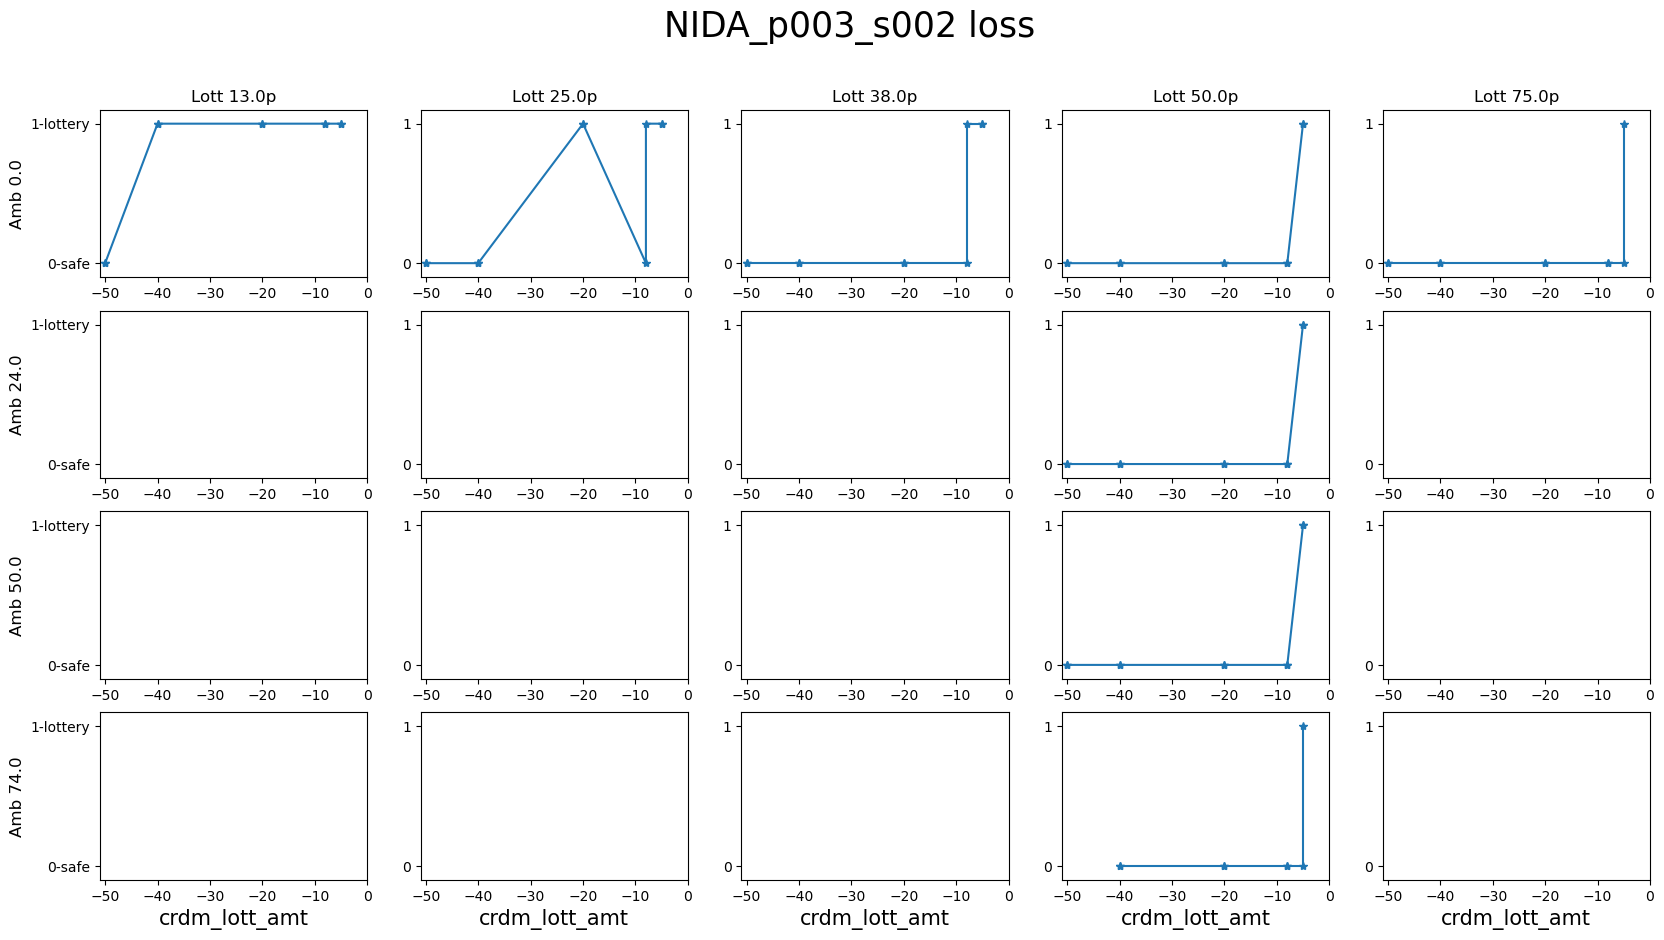

/Volumes/UCDN/datasets/NIDA/split/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm.csv

**WARNING** We dropped 13 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p003_s002/crdm/NIDA_p003_s002_crdm_plot_lottery_amt_choice_combined.png


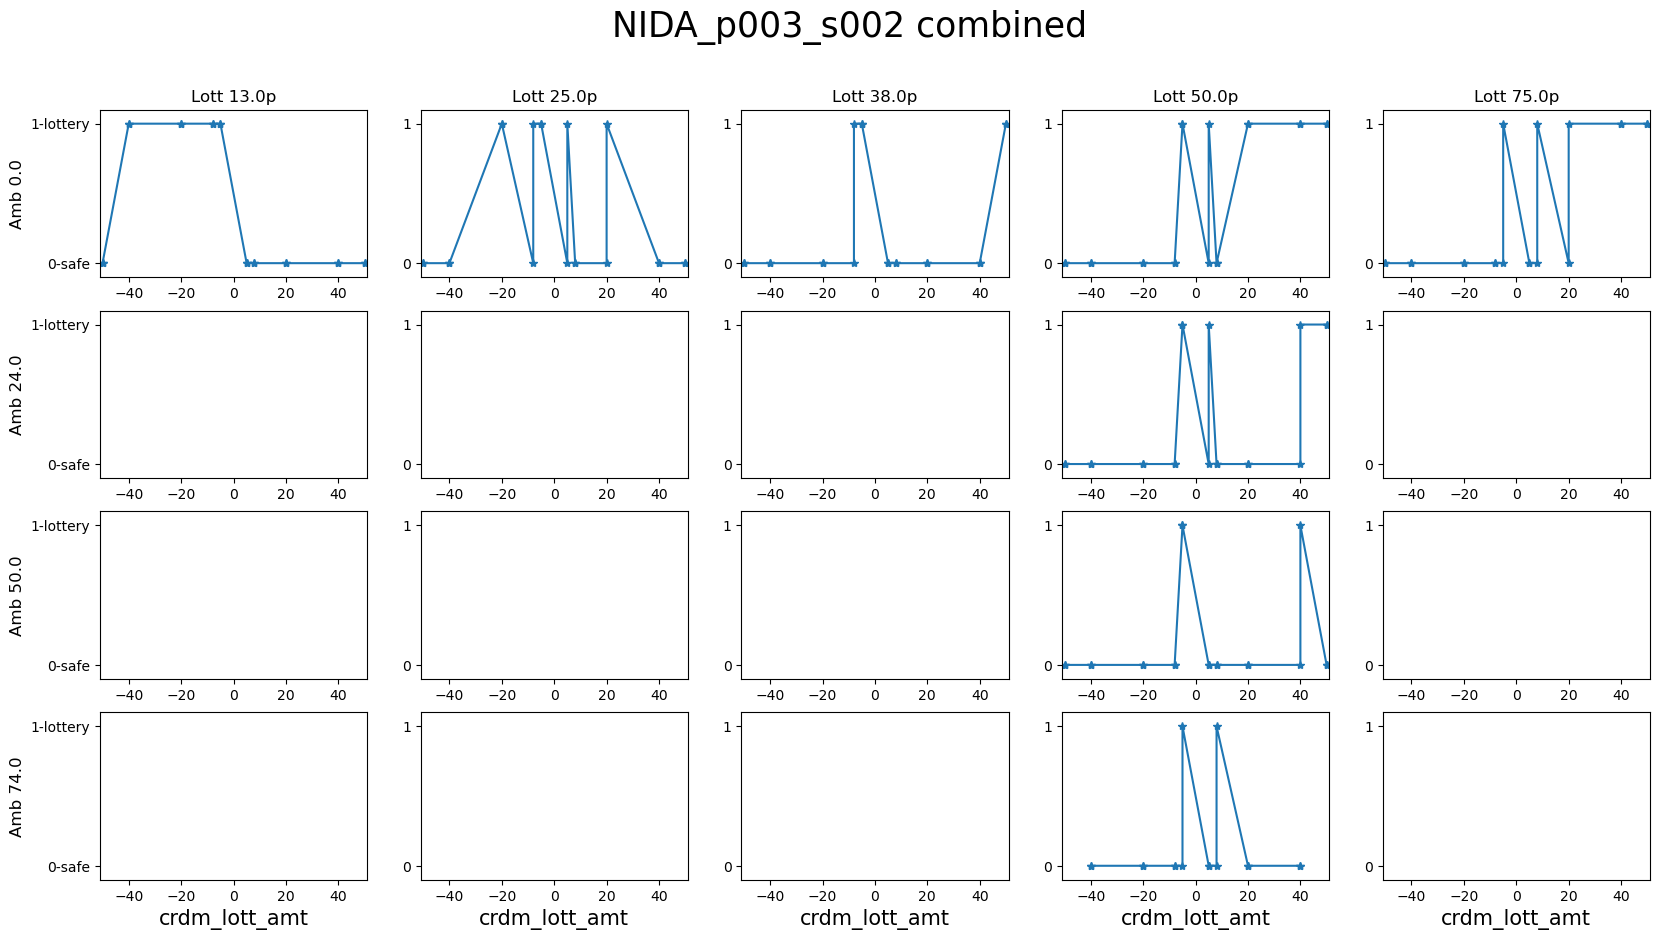

/Volumes/UCDN/datasets/NIDA/split/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 6 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm_plot_lottery_amt_choice_gain.png


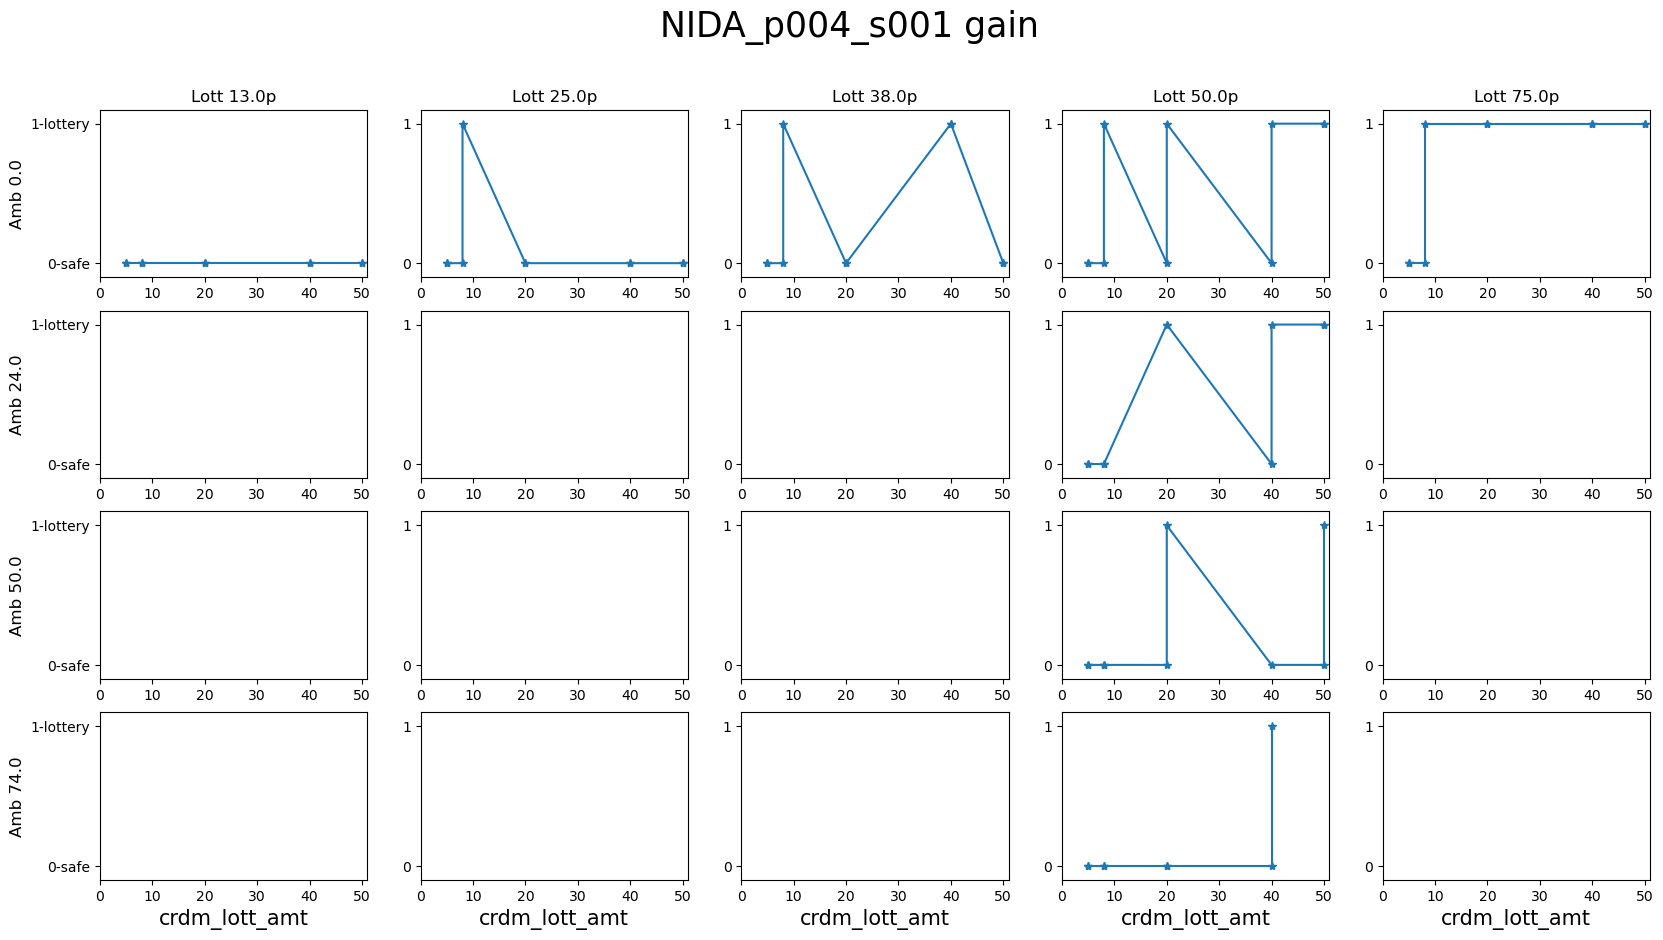

/Volumes/UCDN/datasets/NIDA/split/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm_plot_lottery_amt_choice_loss.png


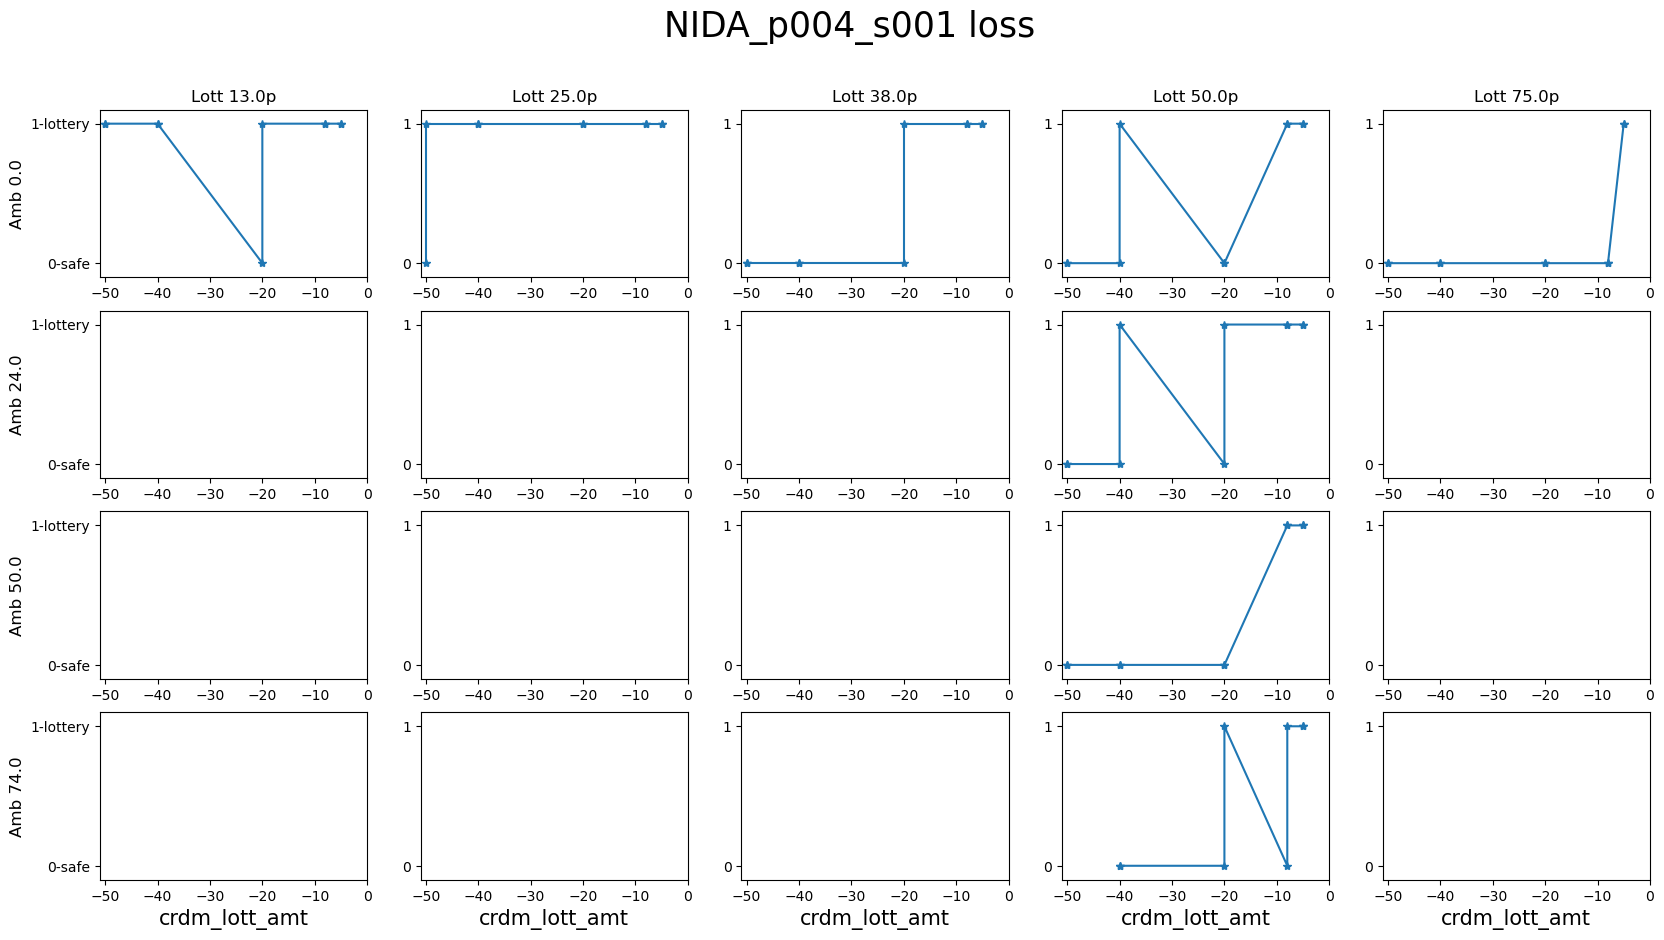

/Volumes/UCDN/datasets/NIDA/split/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm.csv

**WARNING** We dropped 14 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s001/crdm/NIDA_p004_s001_crdm_plot_lottery_amt_choice_combined.png


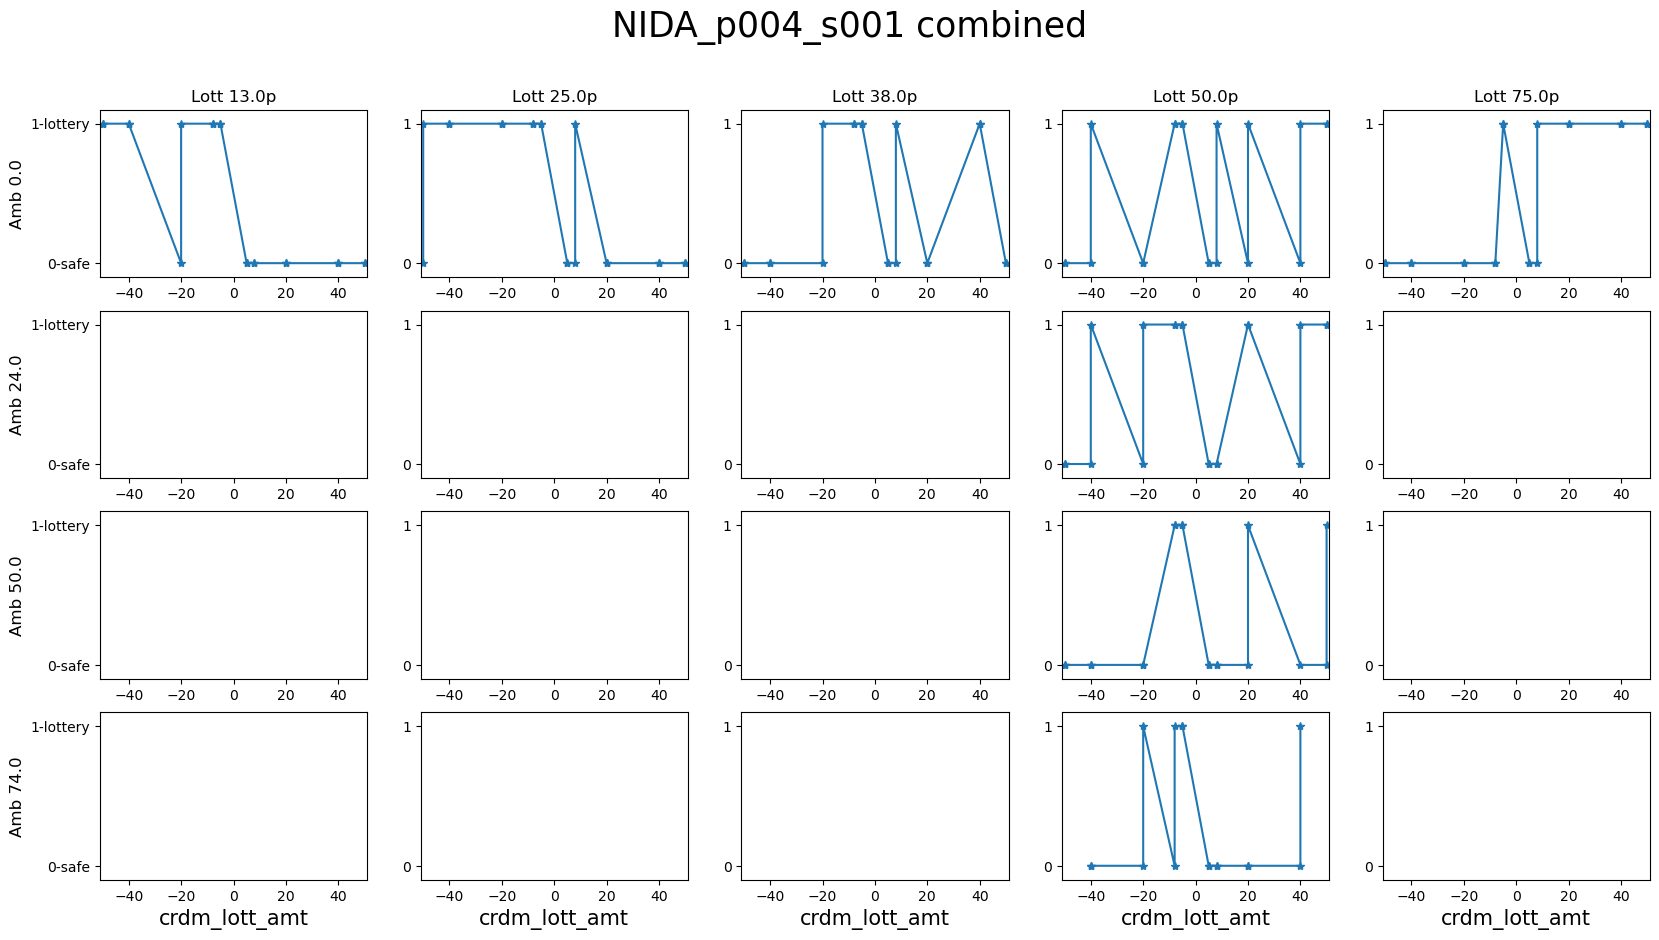

/Volumes/UCDN/datasets/NIDA/split/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm_plot_lottery_amt_choice_gain.png


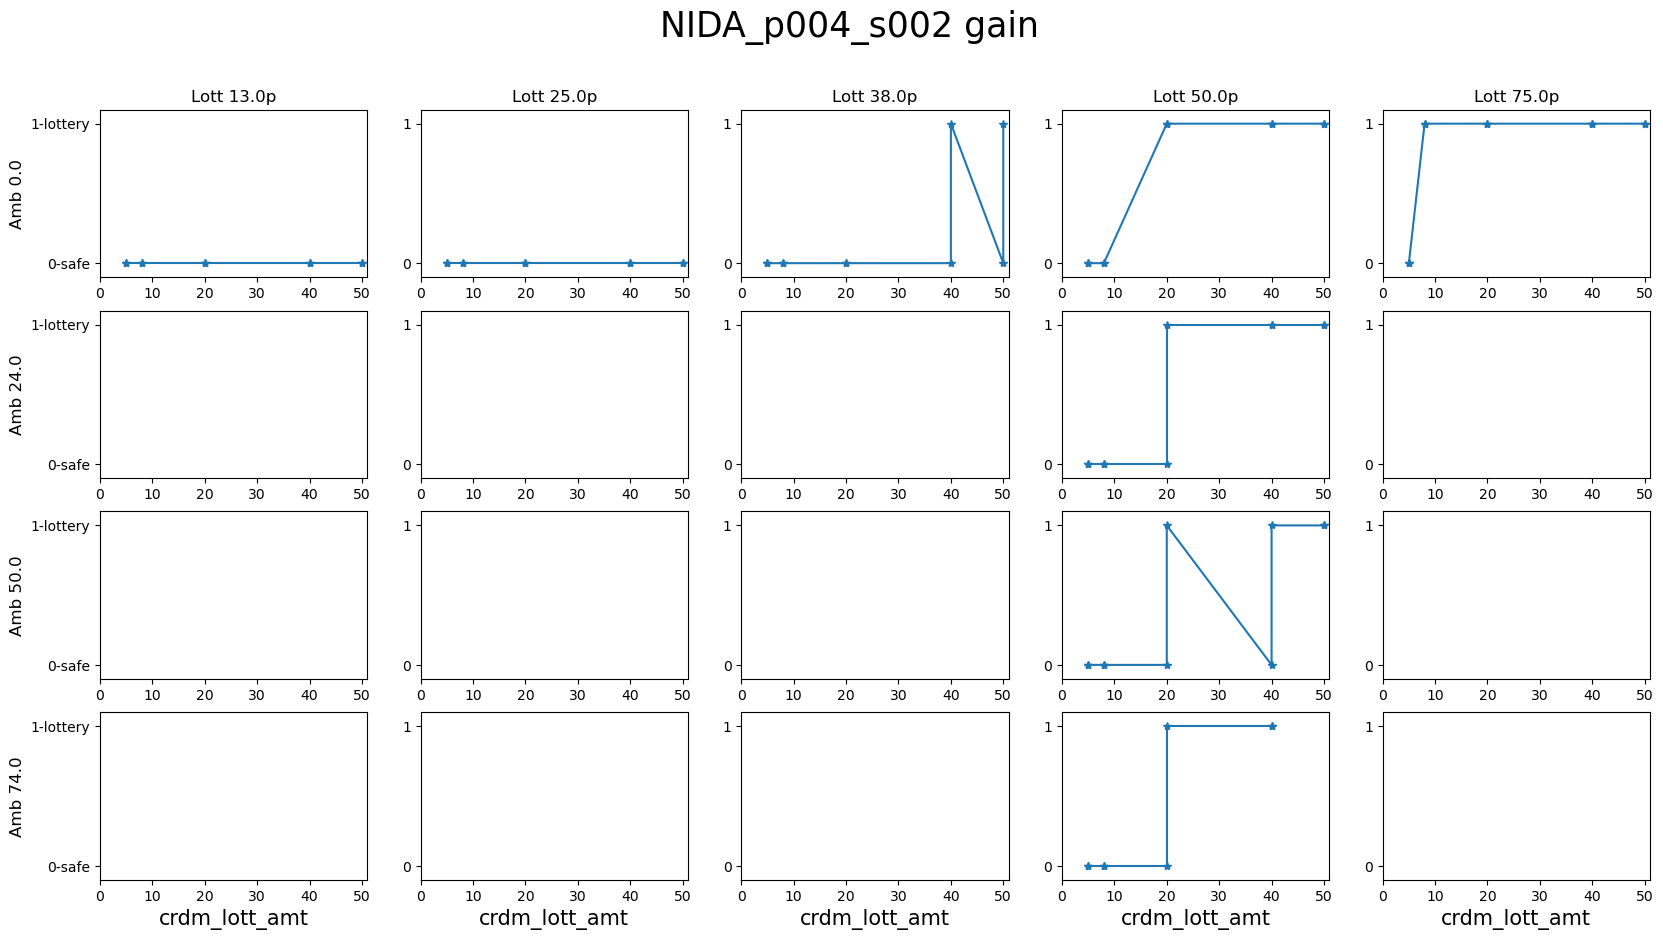

/Volumes/UCDN/datasets/NIDA/split/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm_plot_lottery_amt_choice_loss.png


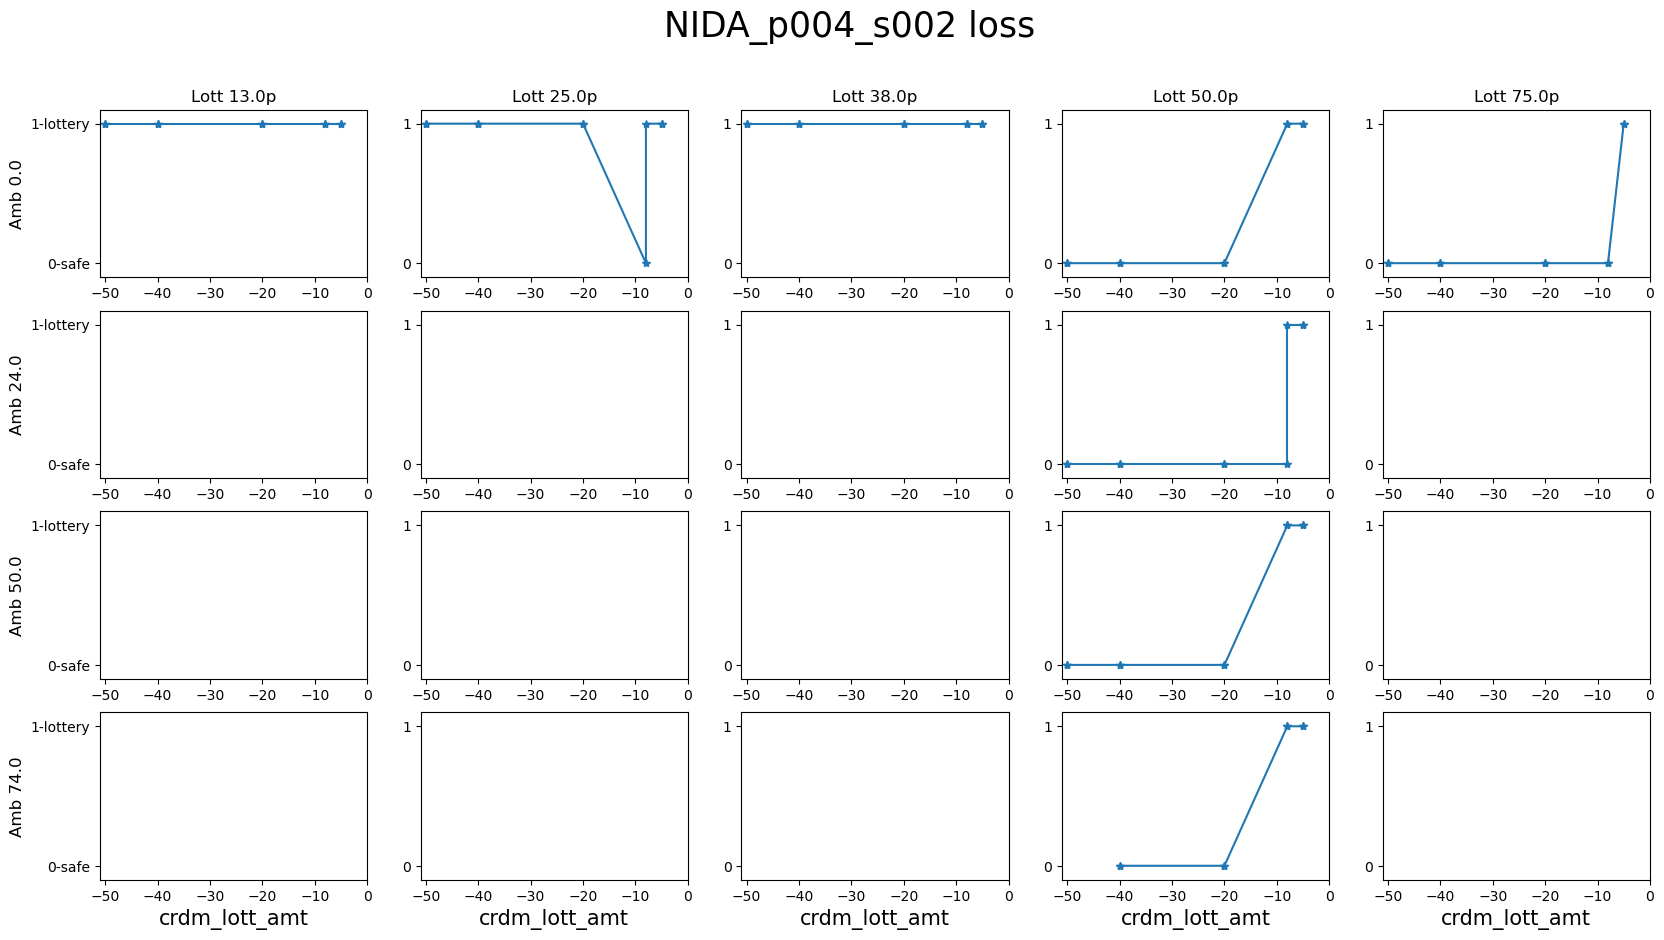

/Volumes/UCDN/datasets/NIDA/split/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm.csv

**WARNING** We dropped 13 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p004_s002/crdm/NIDA_p004_s002_crdm_plot_lottery_amt_choice_combined.png


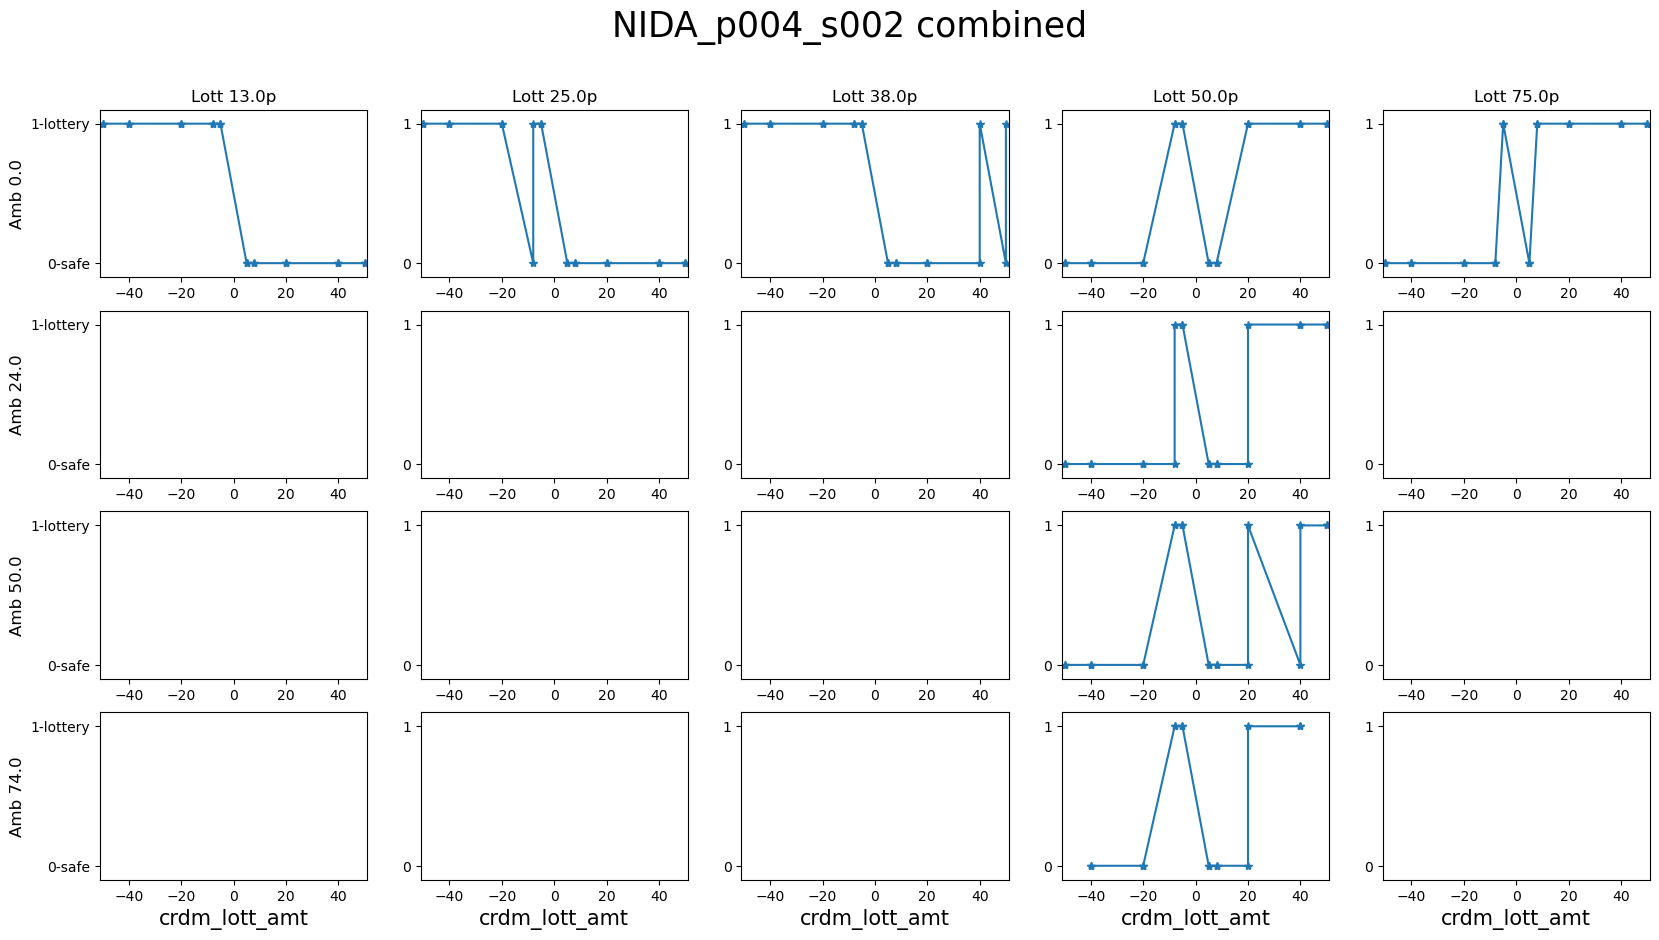

/Volumes/UCDN/datasets/NIDA/split/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm_plot_lottery_amt_choice_gain.png


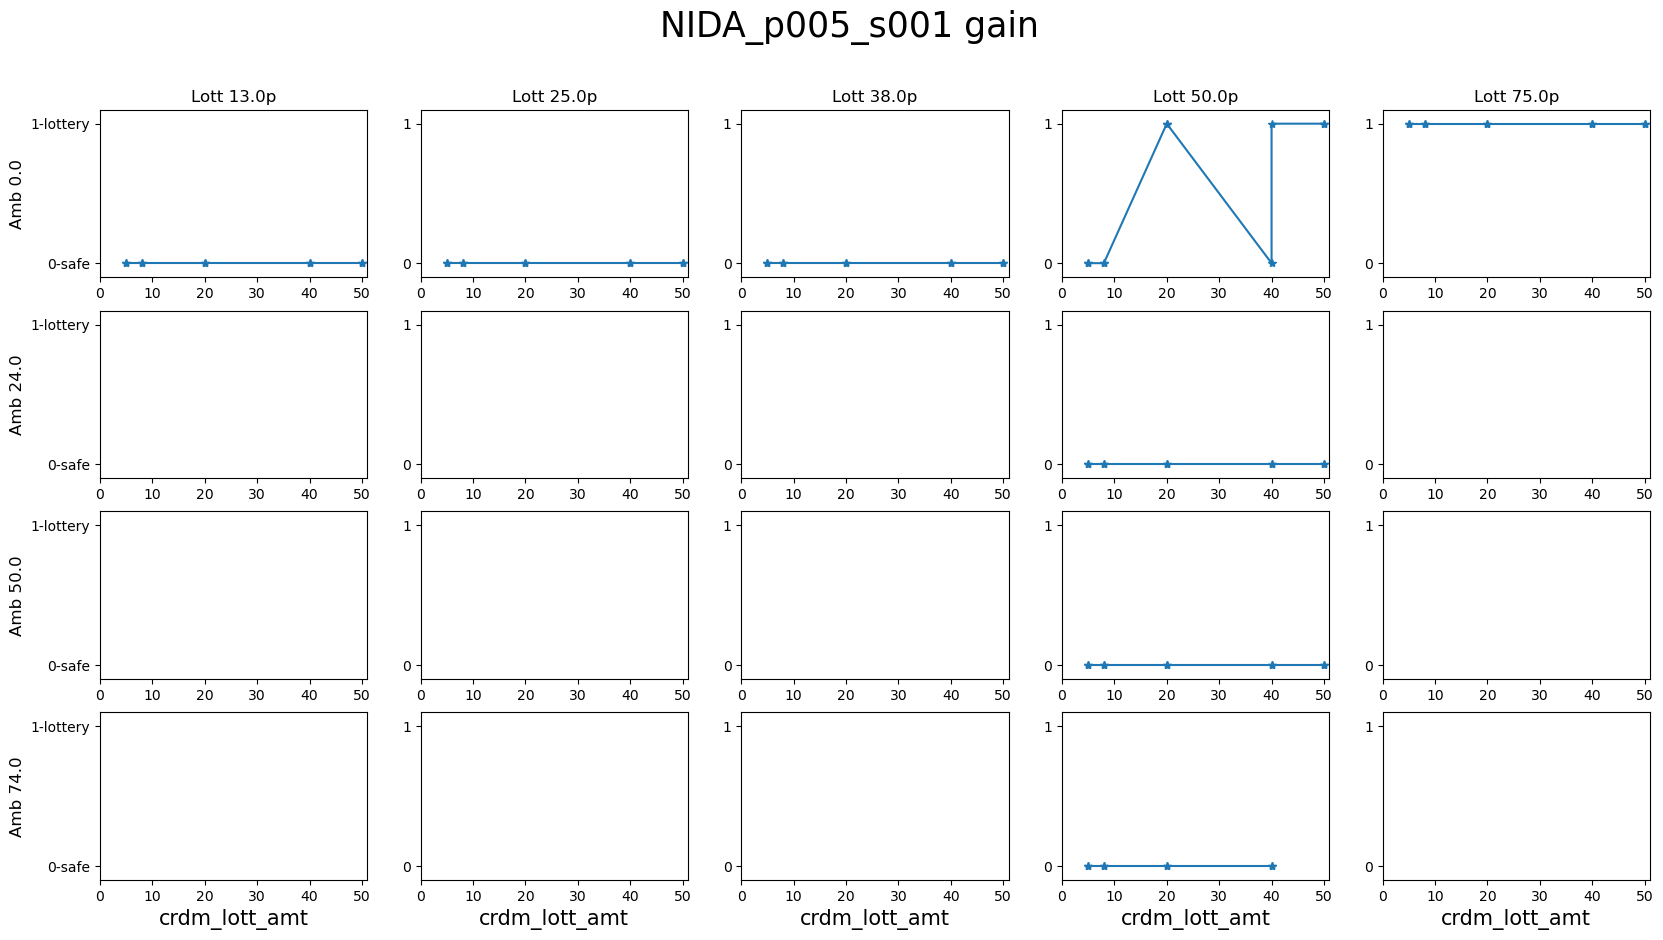

/Volumes/UCDN/datasets/NIDA/split/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 6 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm_plot_lottery_amt_choice_loss.png


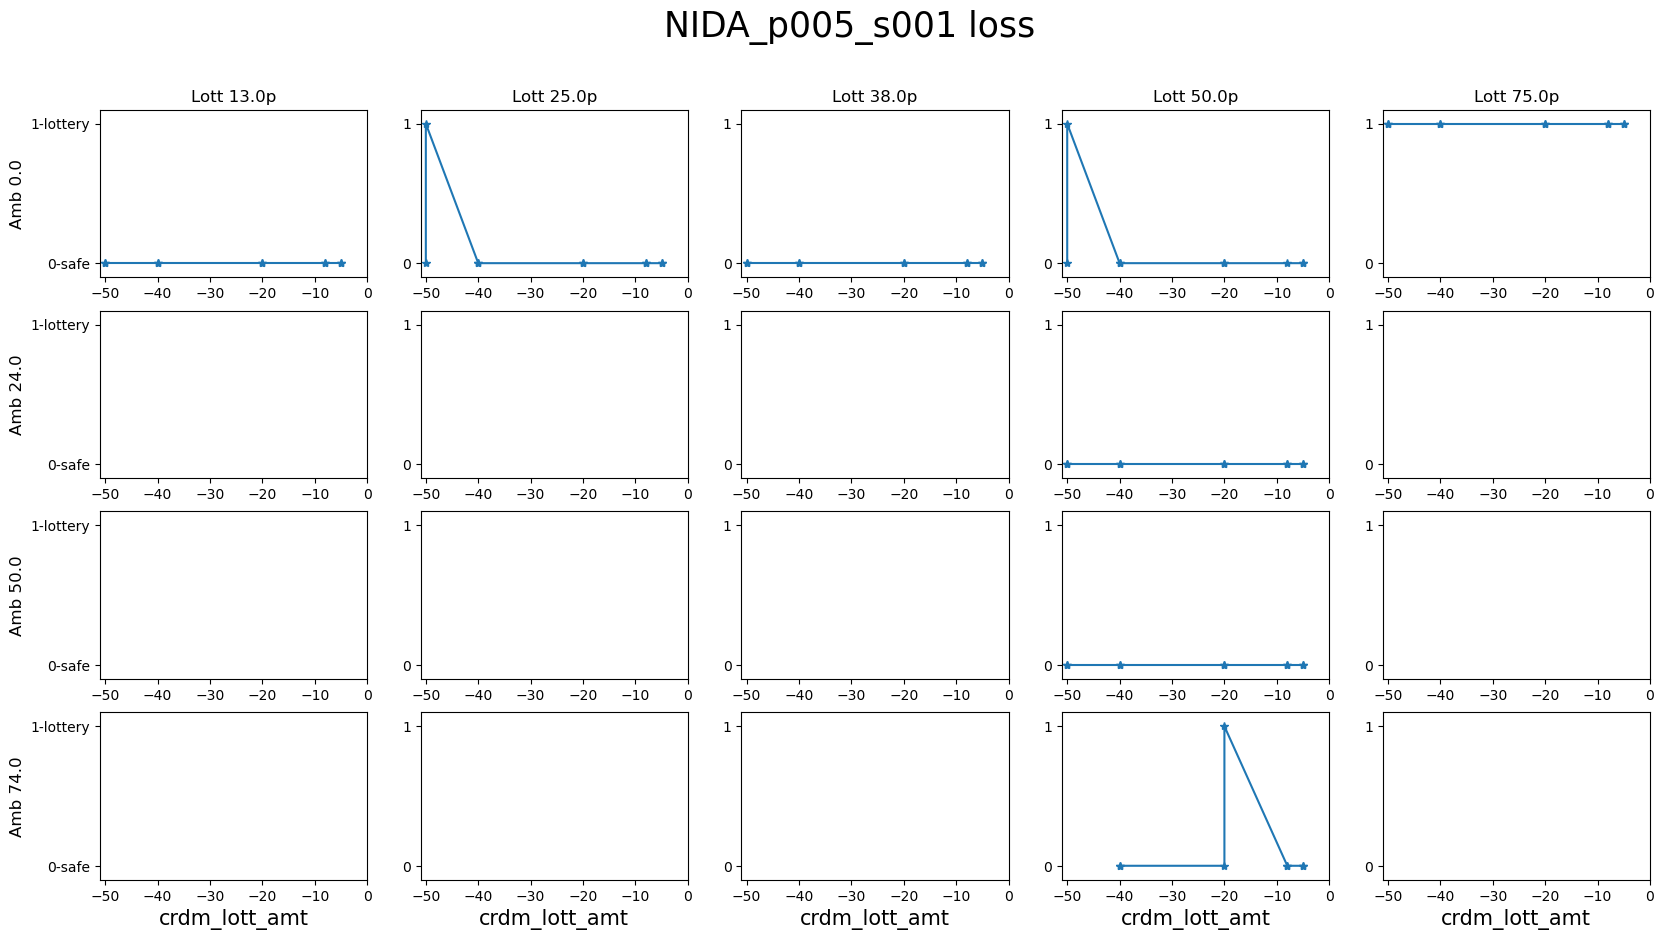

/Volumes/UCDN/datasets/NIDA/split/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm.csv

**WARNING** We dropped 14 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s001/crdm/NIDA_p005_s001_crdm_plot_lottery_amt_choice_combined.png


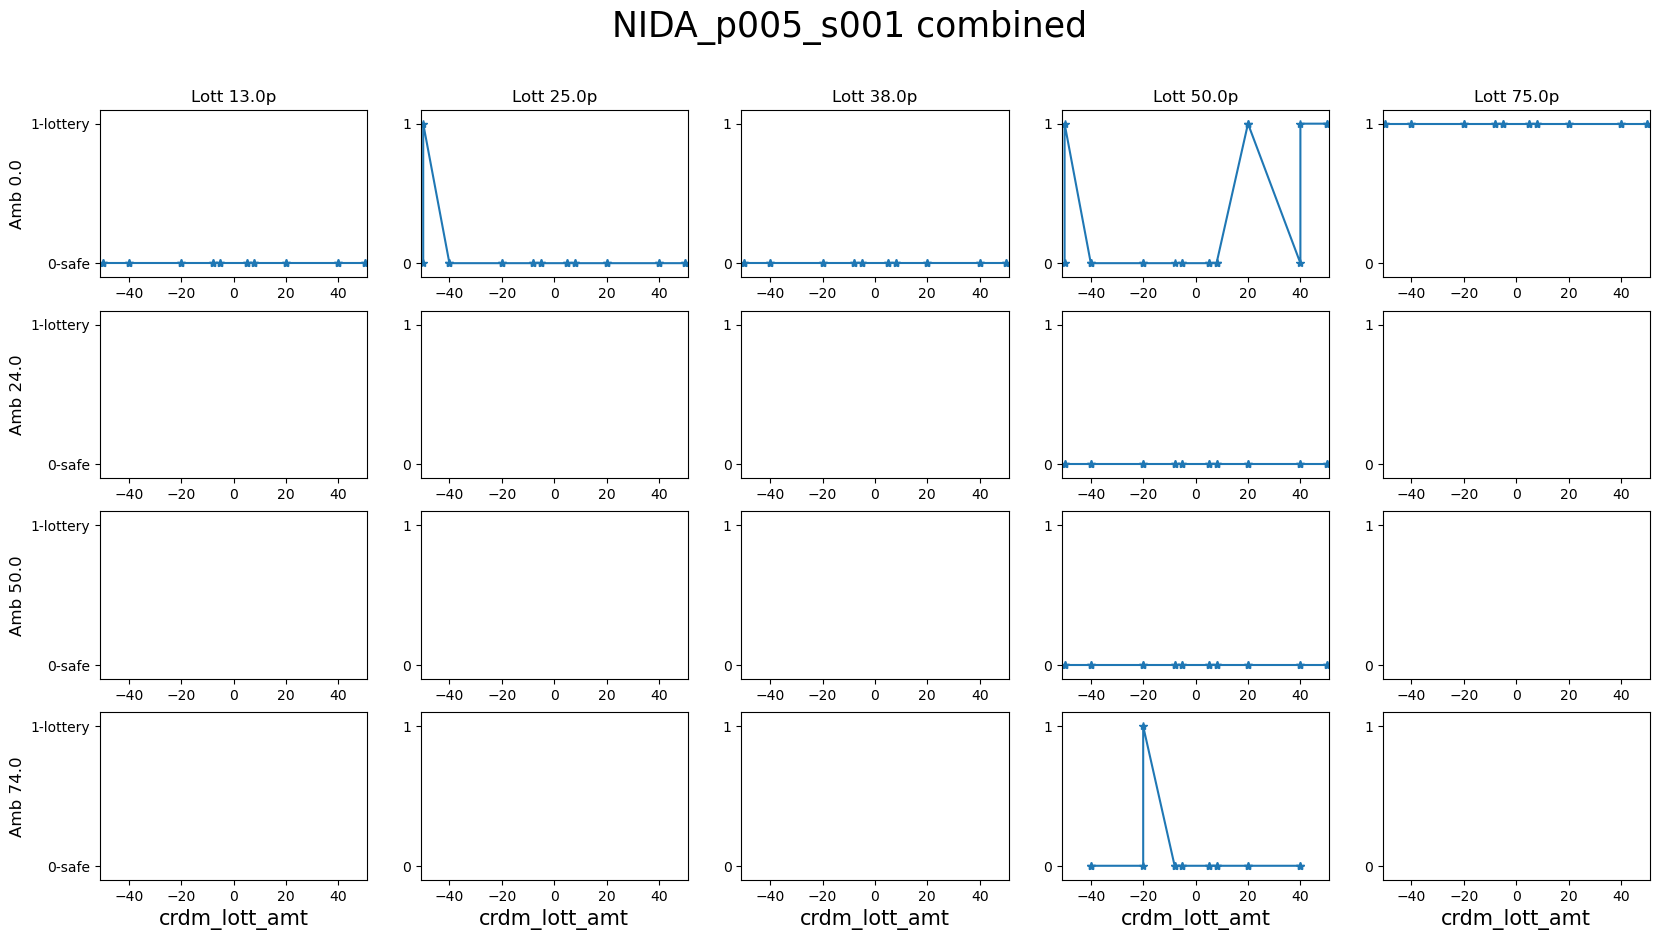

/Volumes/UCDN/datasets/NIDA/split/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm_plot_lottery_amt_choice_gain.png


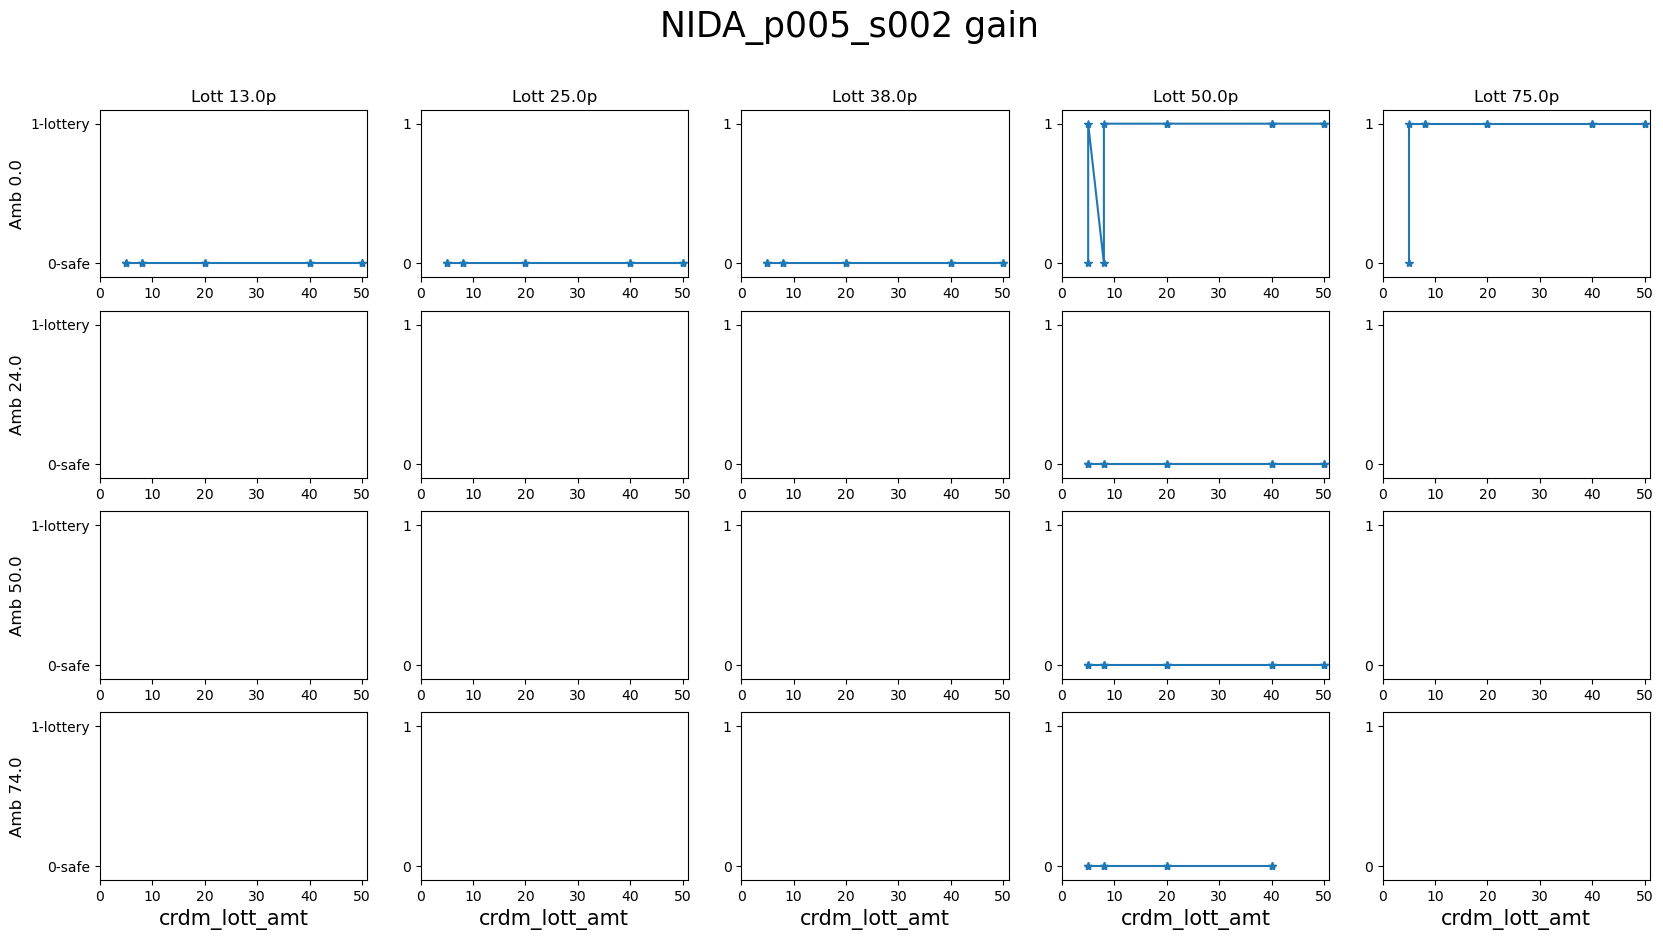

/Volumes/UCDN/datasets/NIDA/split/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm_plot_lottery_amt_choice_loss.png


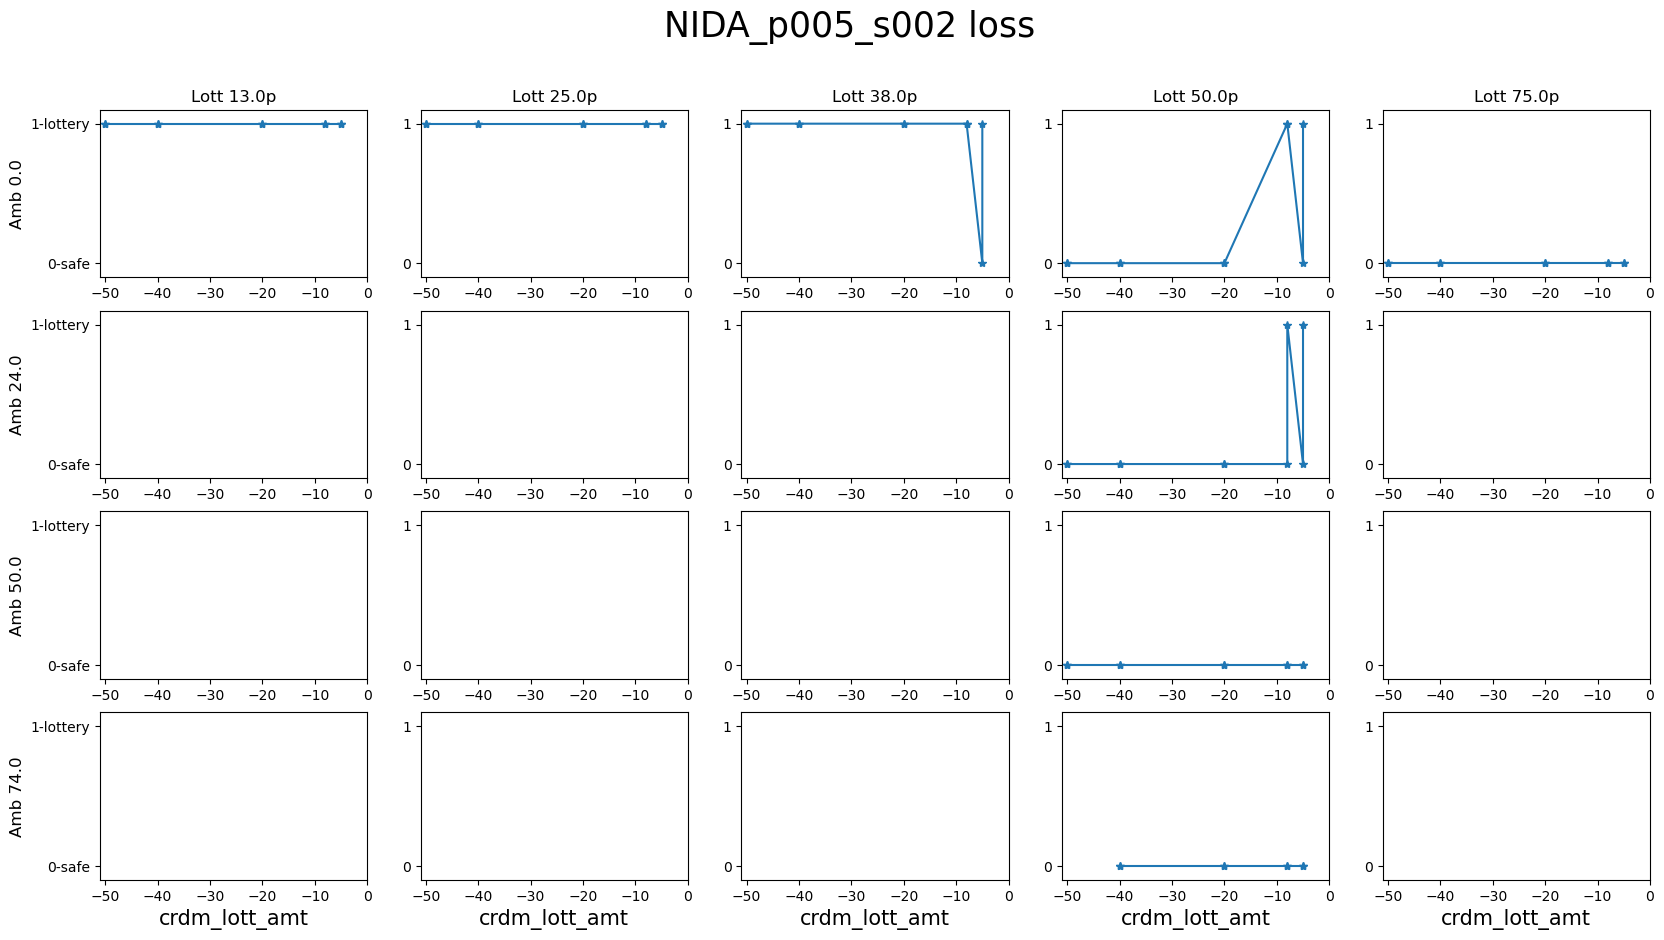

/Volumes/UCDN/datasets/NIDA/split/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm.csv

**WARNING** We dropped 13 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p005_s002/crdm/NIDA_p005_s002_crdm_plot_lottery_amt_choice_combined.png


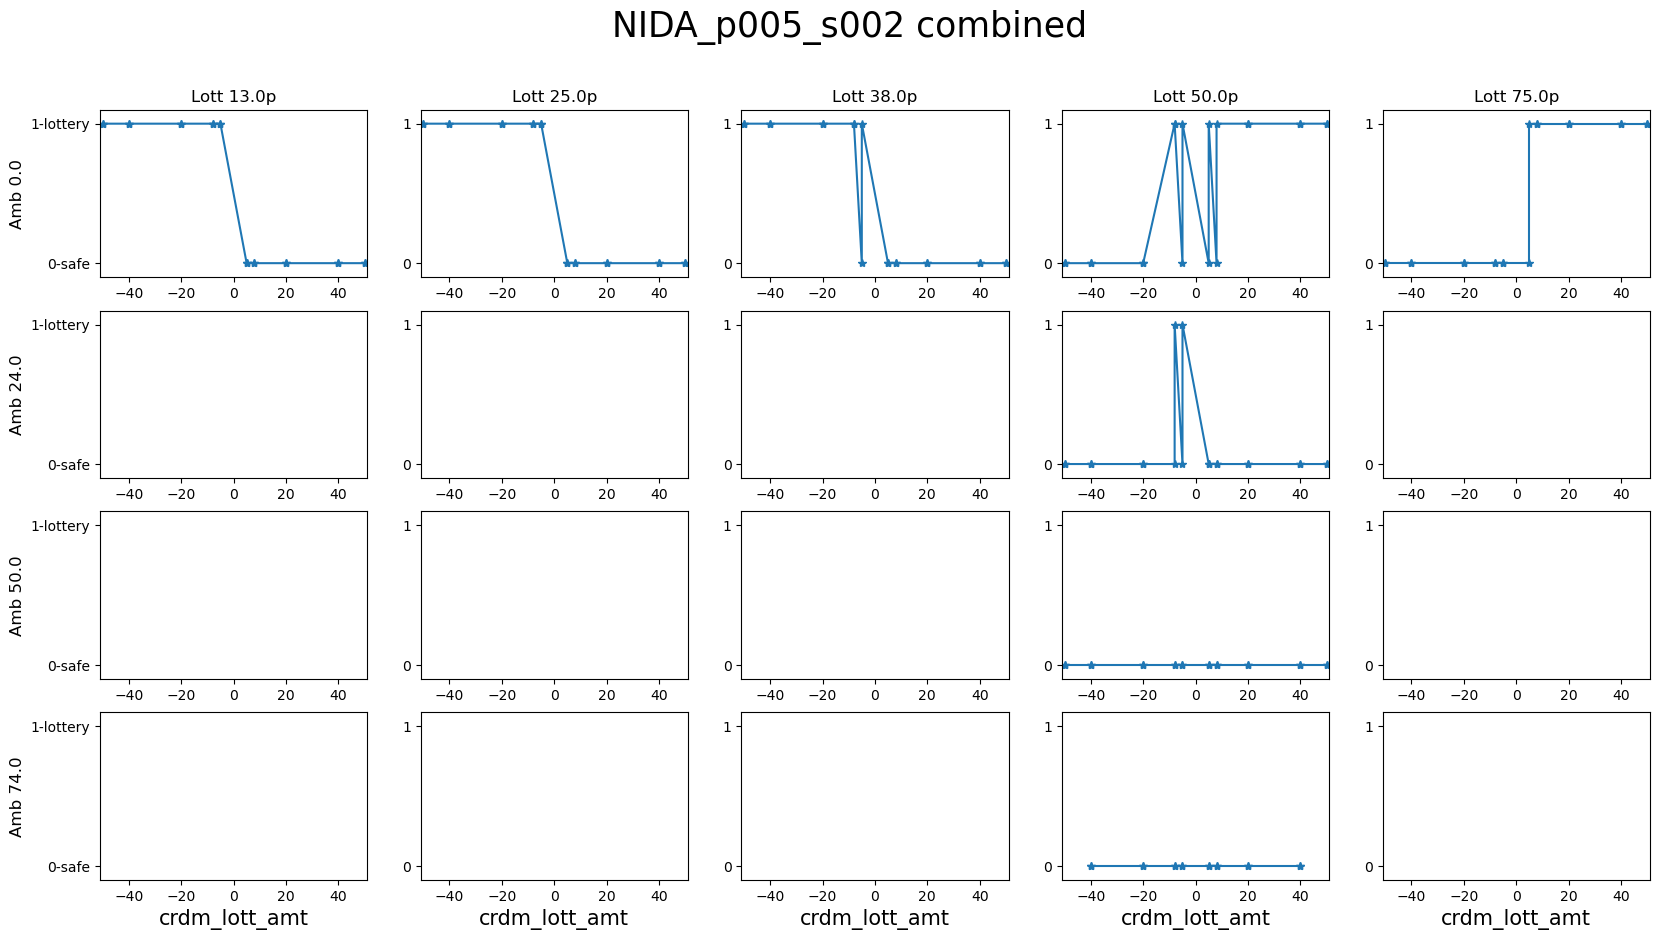

/Volumes/UCDN/datasets/NIDA/split/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm_plot_lottery_amt_choice_gain.png


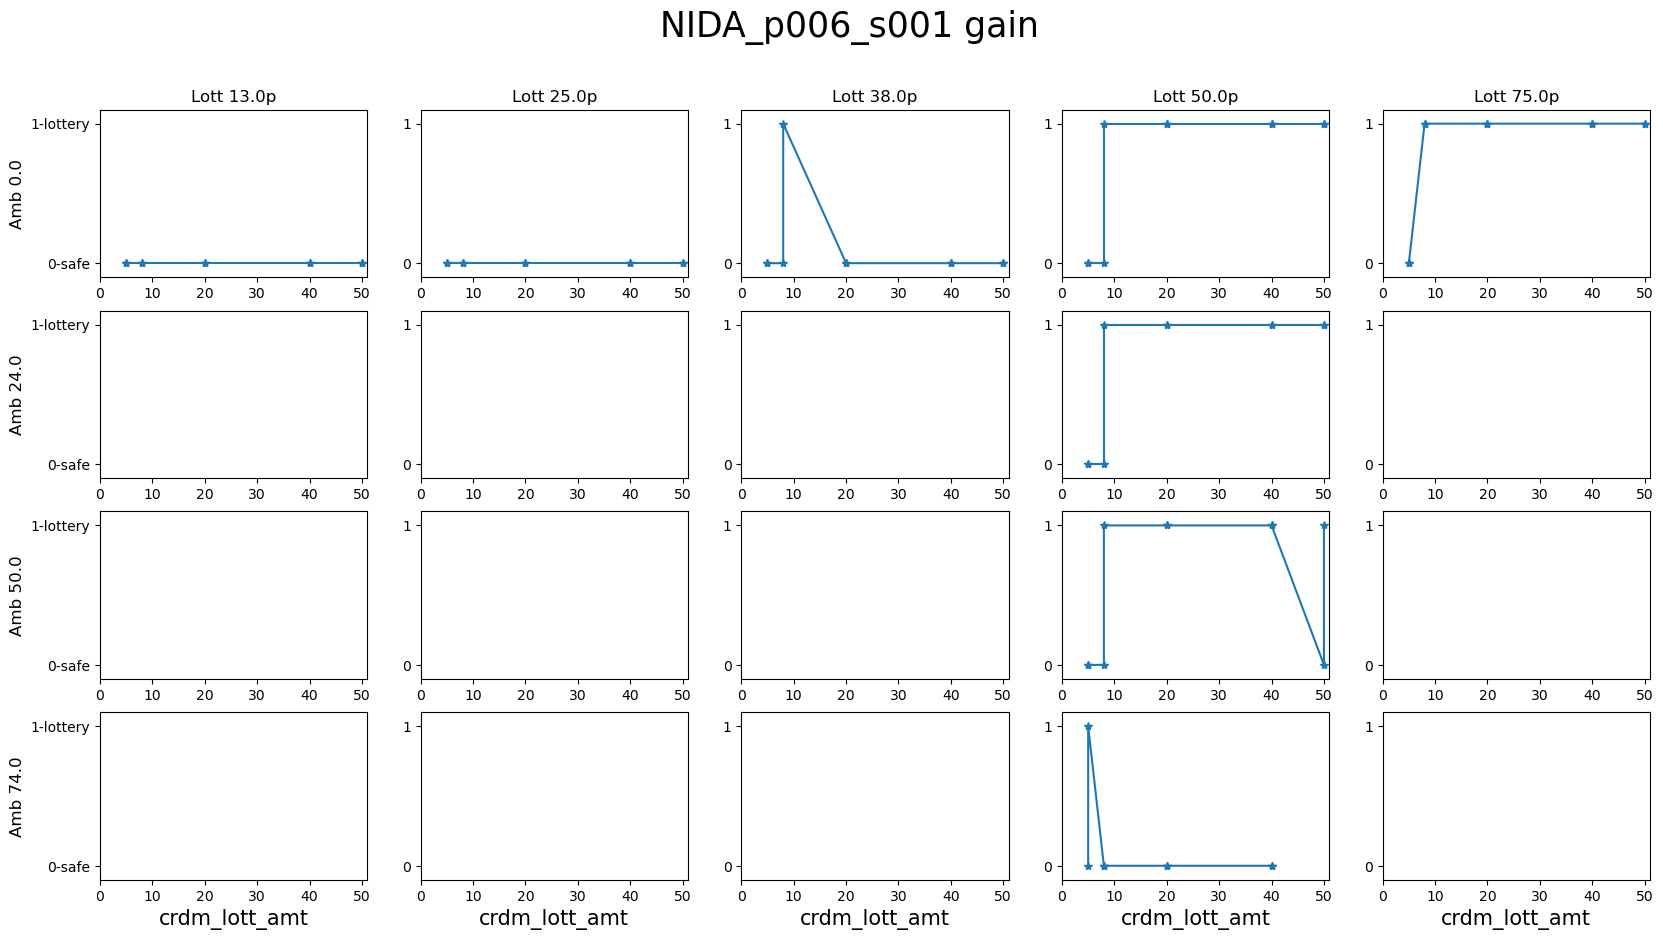

/Volumes/UCDN/datasets/NIDA/split/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 9 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm_plot_lottery_amt_choice_loss.png


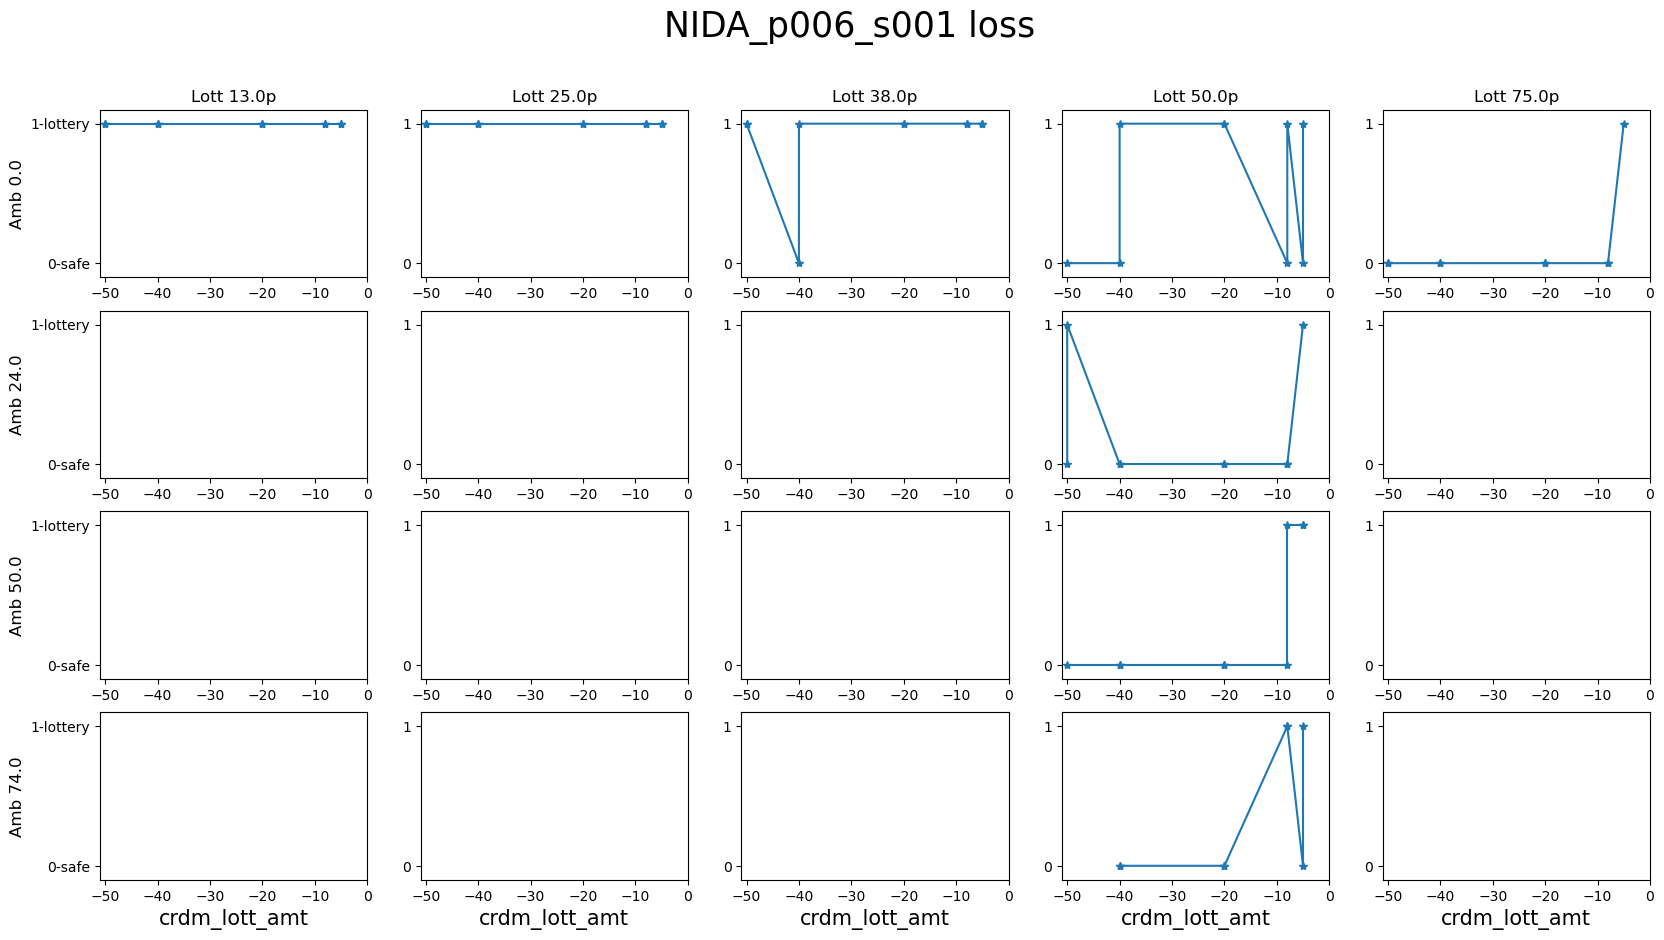

/Volumes/UCDN/datasets/NIDA/split/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm.csv

**WARNING** We dropped 17 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s001/crdm/NIDA_p006_s001_crdm_plot_lottery_amt_choice_combined.png


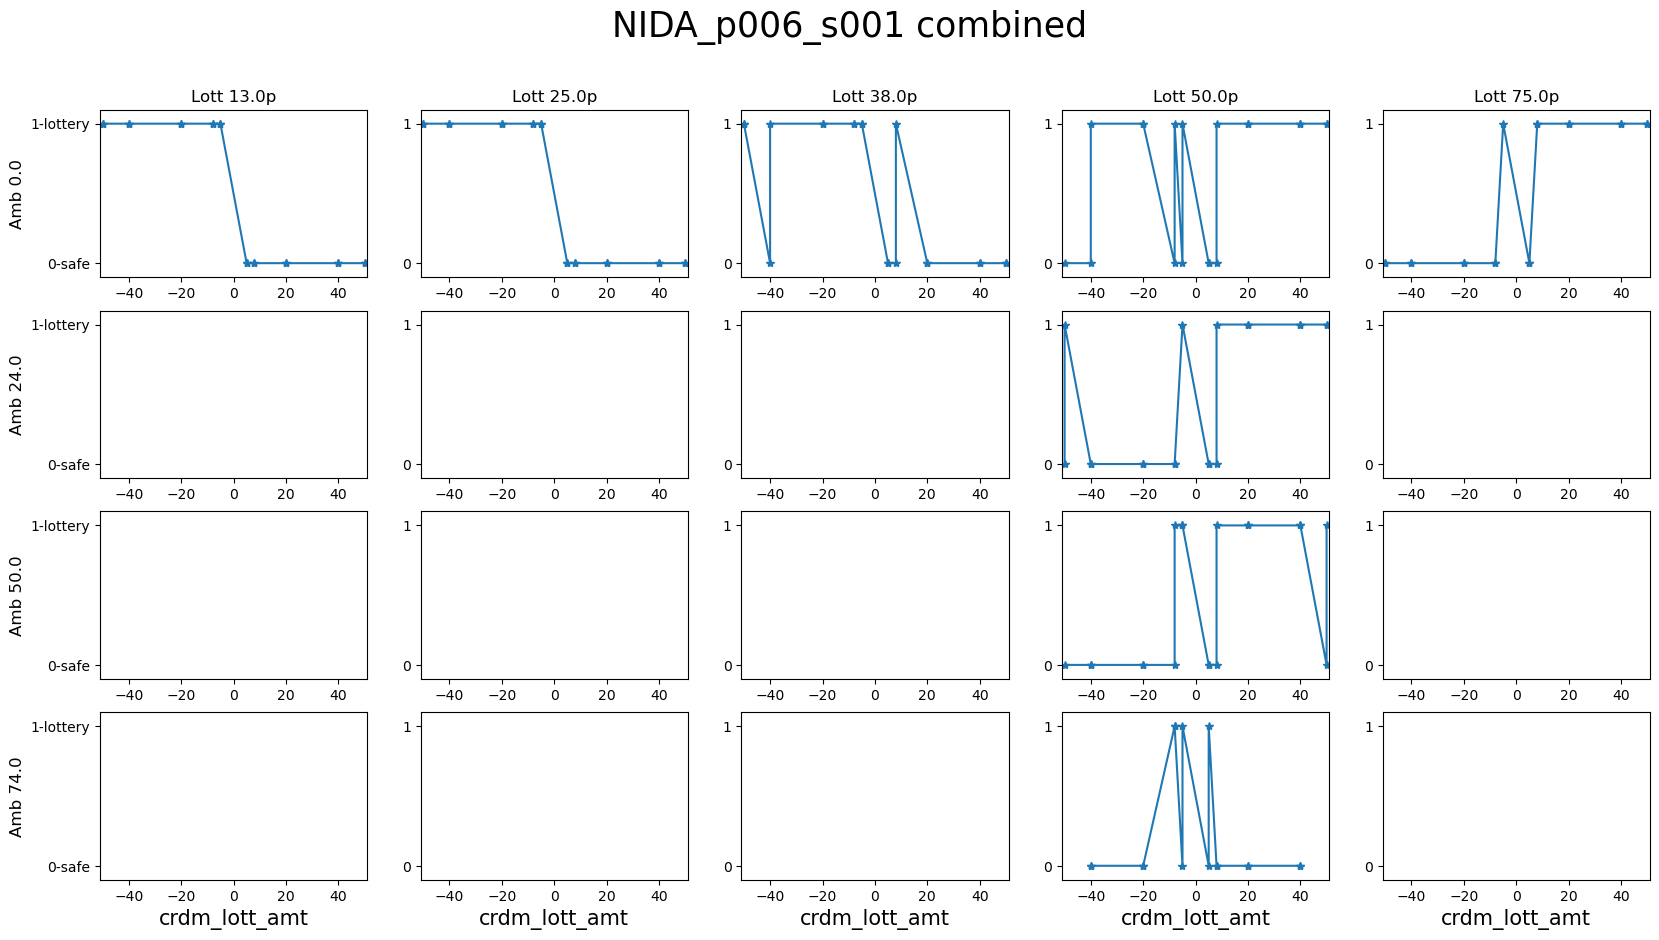

/Volumes/UCDN/datasets/NIDA/split/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 7 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm_plot_lottery_amt_choice_gain.png


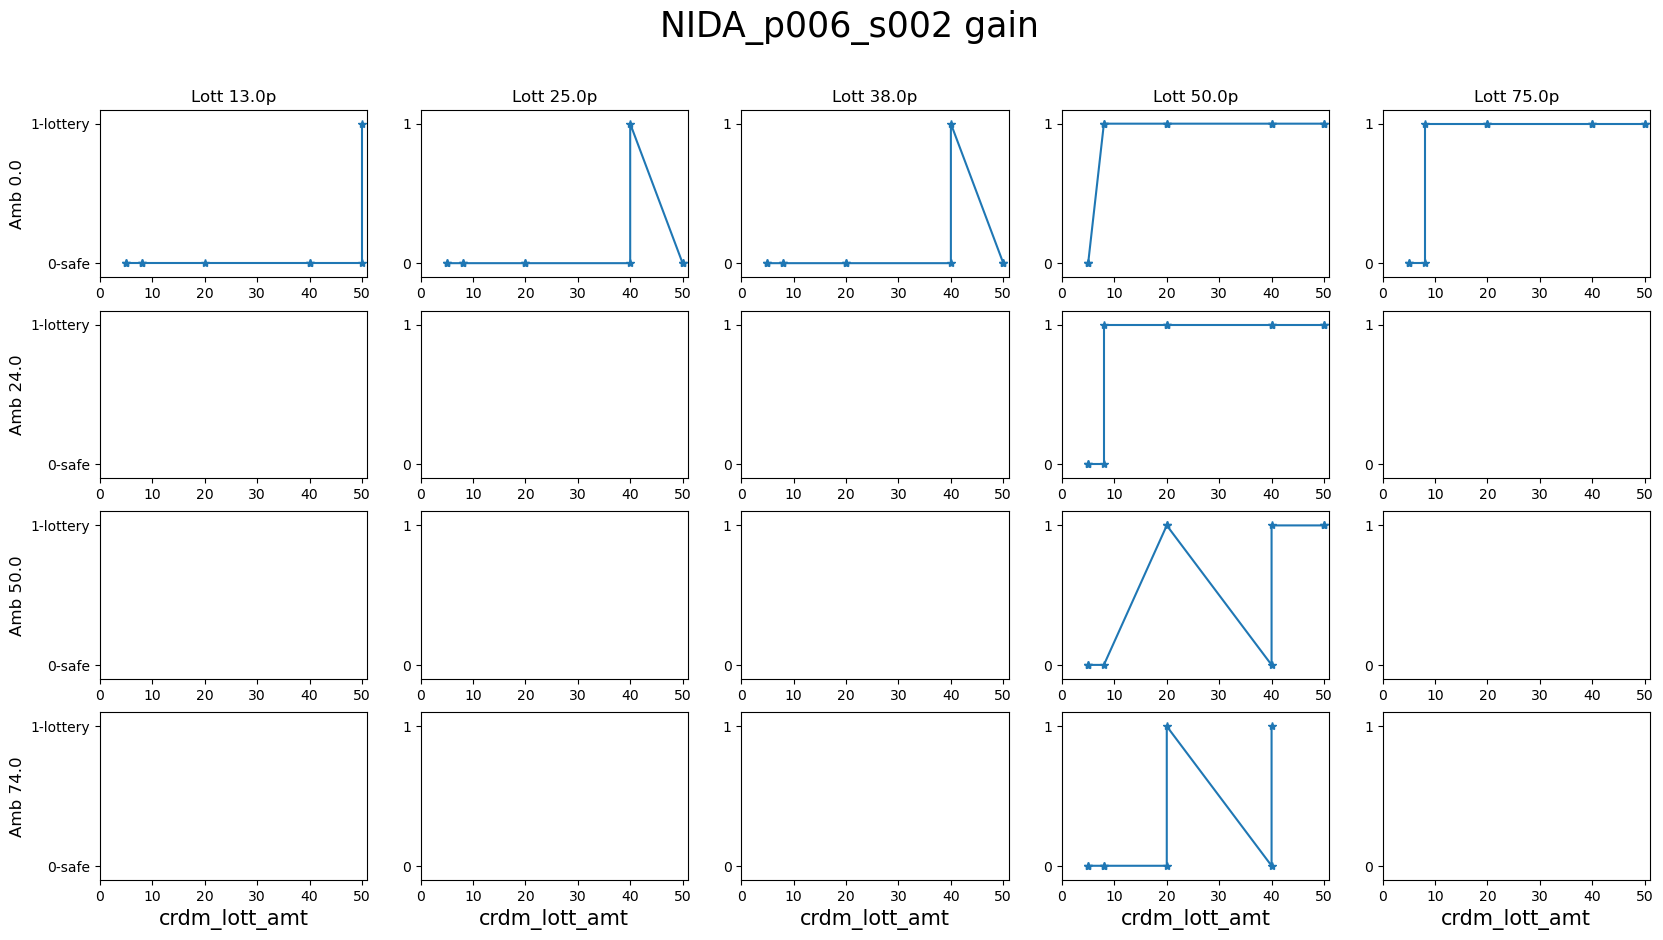

/Volumes/UCDN/datasets/NIDA/split/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 5 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm_plot_lottery_amt_choice_loss.png


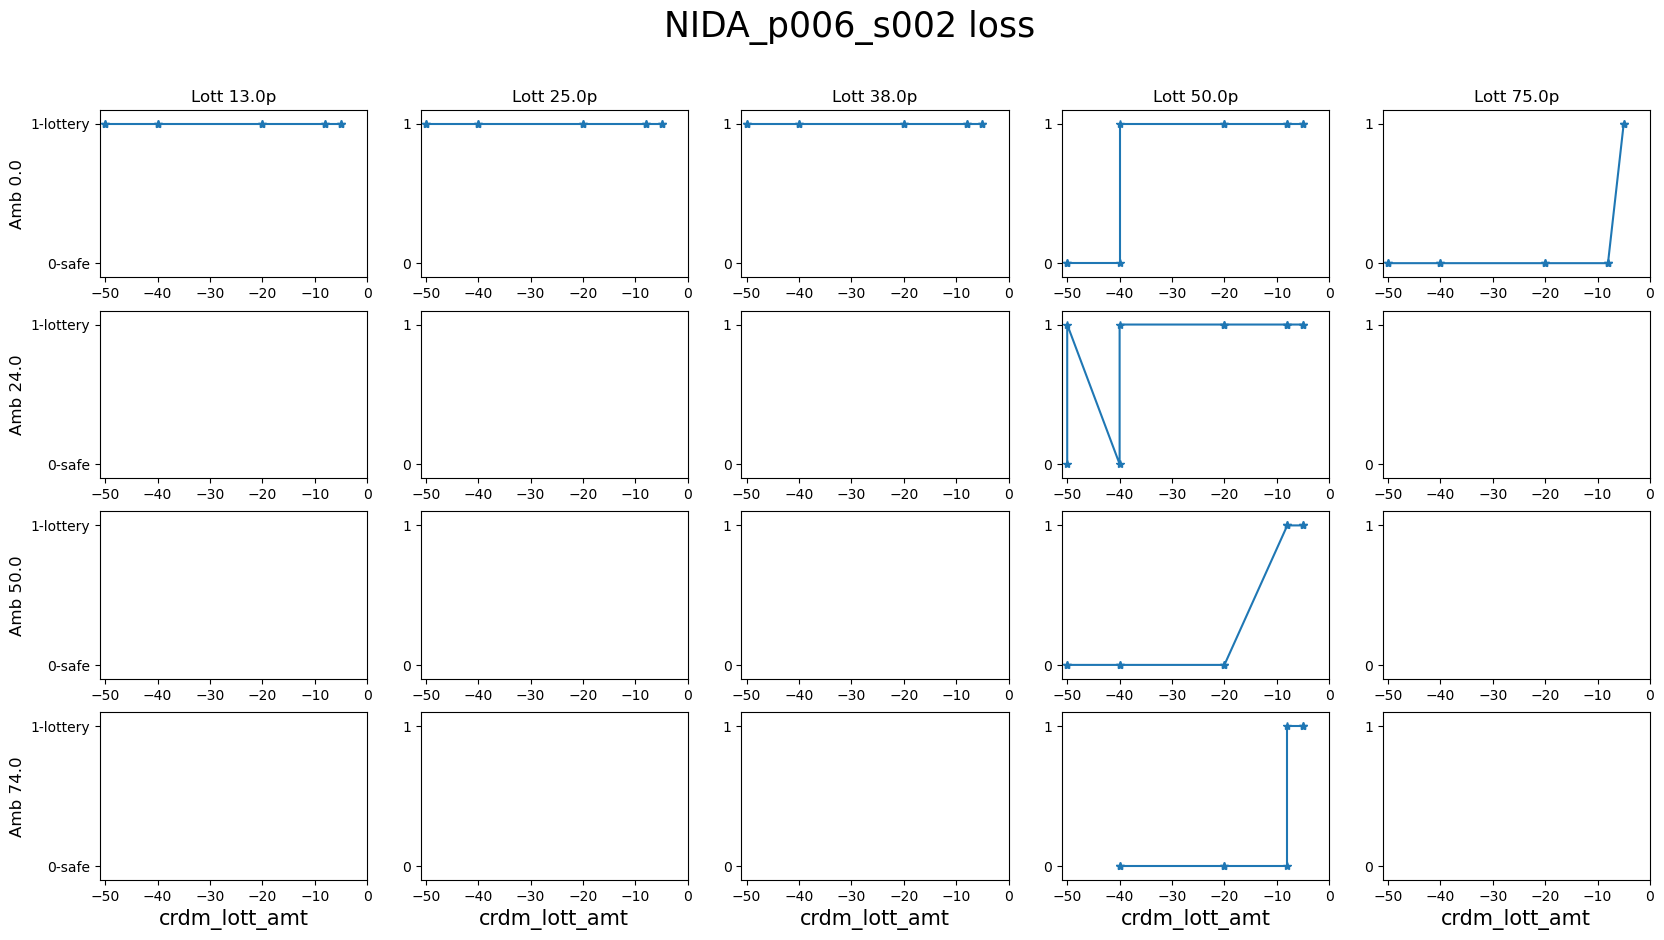

/Volumes/UCDN/datasets/NIDA/split/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm.csv

**WARNING** We dropped 15 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p006_s002/crdm/NIDA_p006_s002_crdm_plot_lottery_amt_choice_combined.png


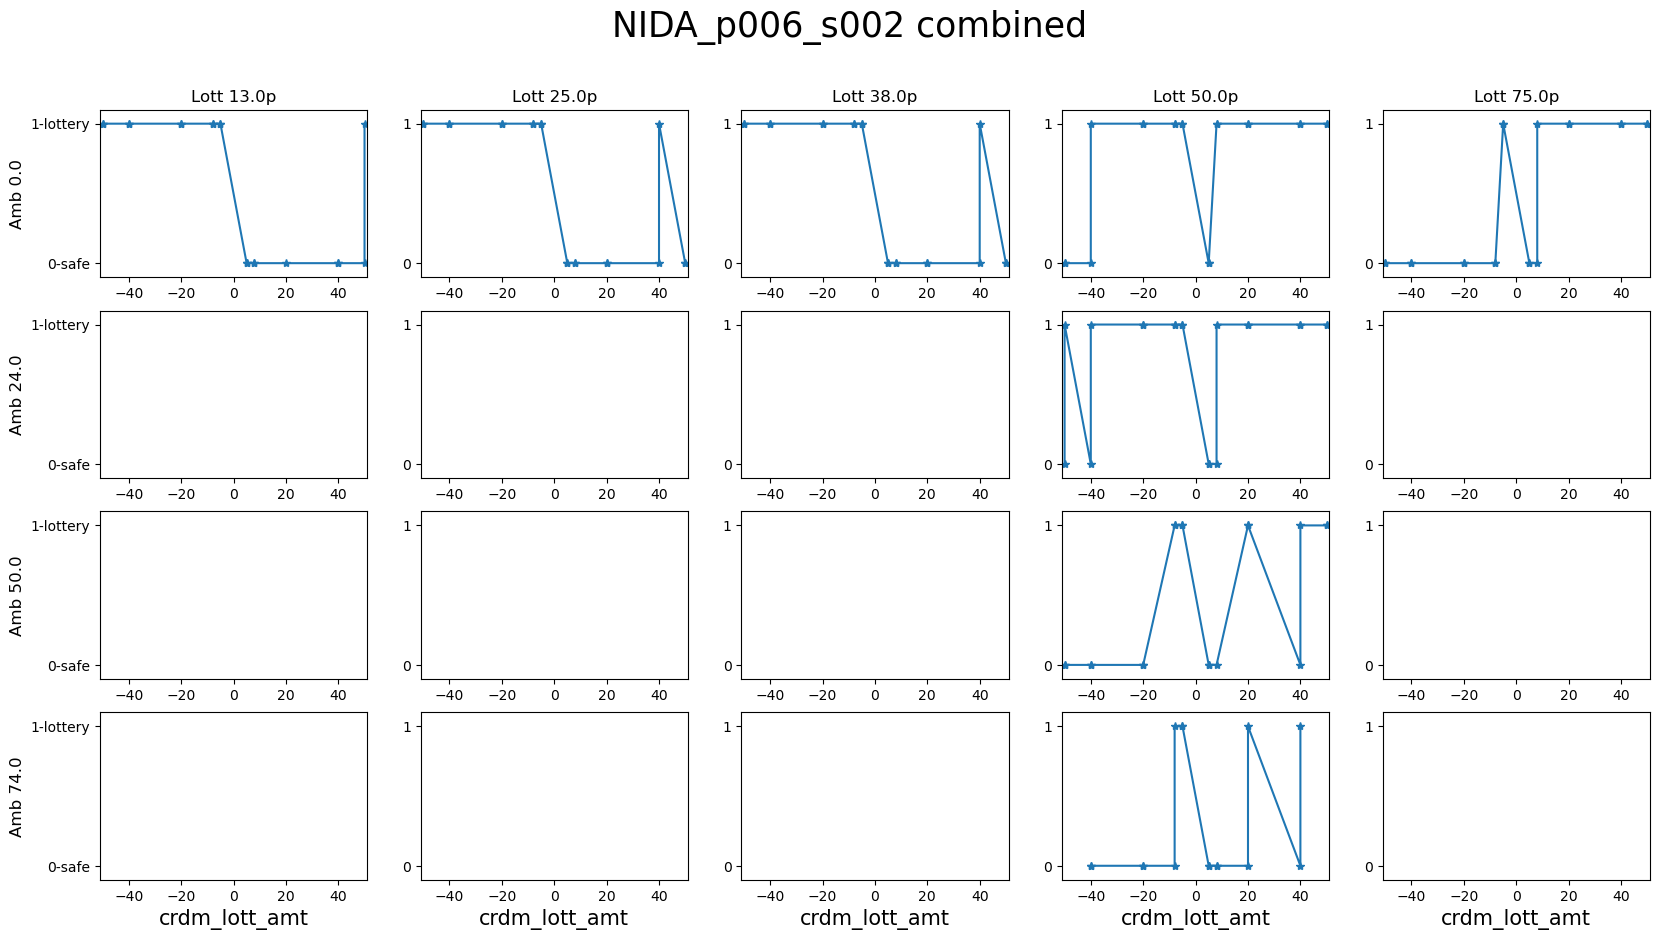

/Volumes/UCDN/datasets/NIDA/split/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm.csv
Working on this domain: gain

**WARNING** We dropped 21 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm_plot_lottery_amt_choice_gain.png


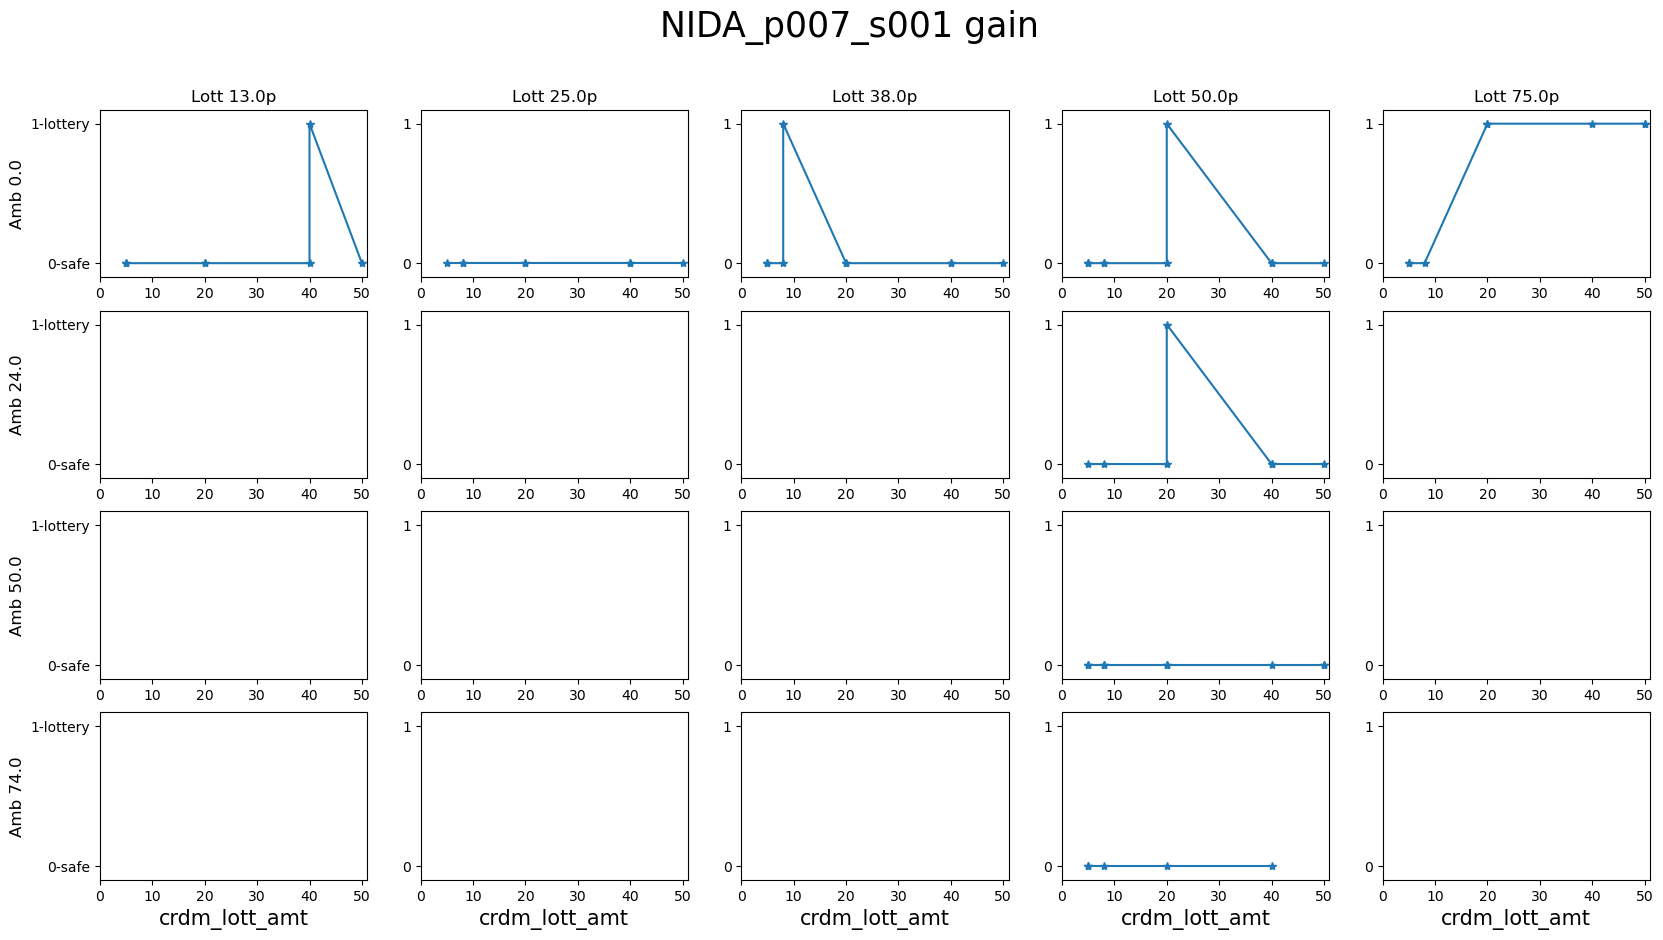

/Volumes/UCDN/datasets/NIDA/split/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm.csv
Working on this domain: loss

**WARNING** We dropped 36 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm_plot_lottery_amt_choice_loss.png


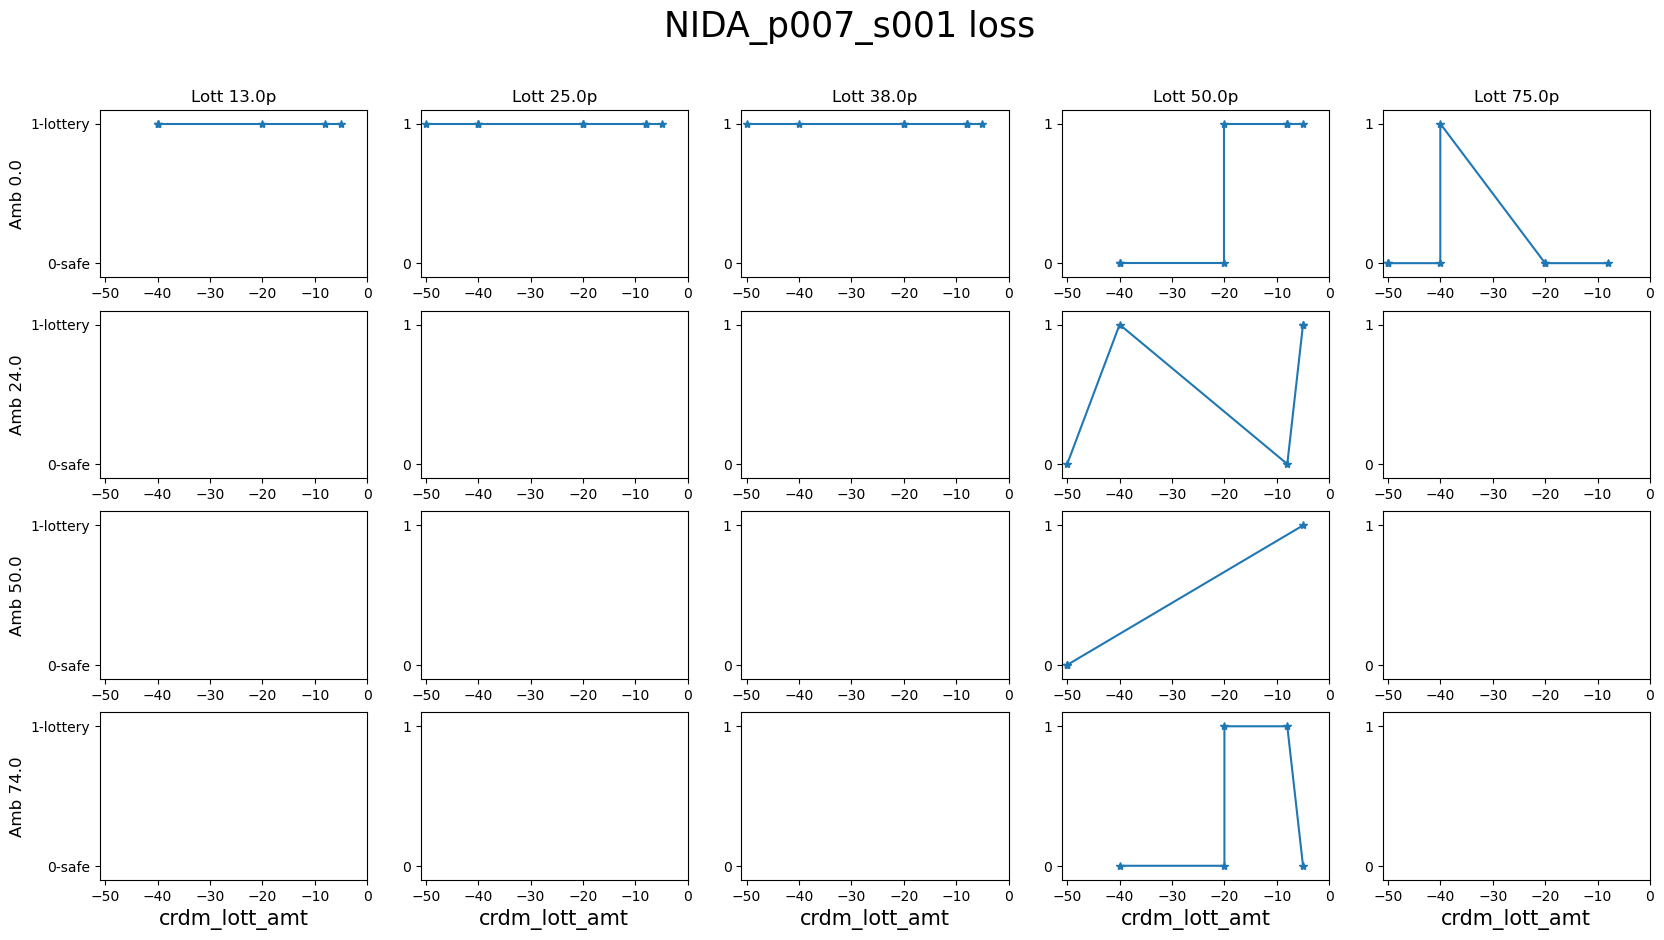

/Volumes/UCDN/datasets/NIDA/split/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm.csv

**WARNING** We dropped 60 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s001/crdm/NIDA_p007_s001_crdm_plot_lottery_amt_choice_combined.png


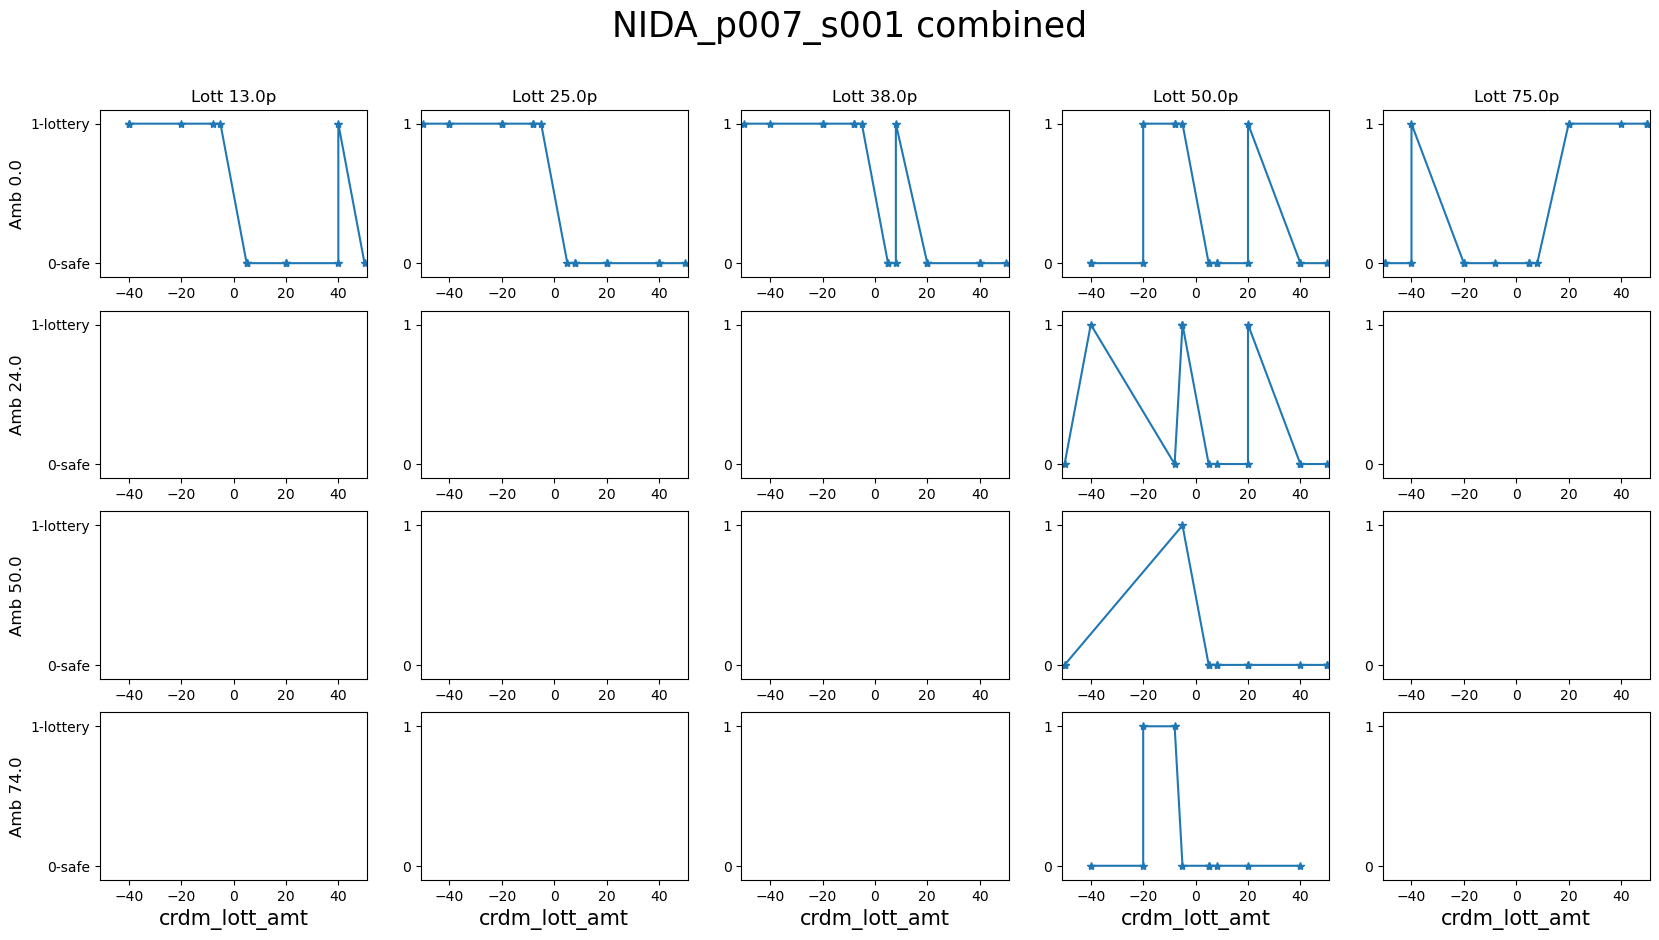

/Volumes/UCDN/datasets/NIDA/split/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm.csv
Working on this domain: gain

**WARNING** We dropped 6 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm_lottery_amt_choice_gain.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm_plot_lottery_amt_choice_gain.png


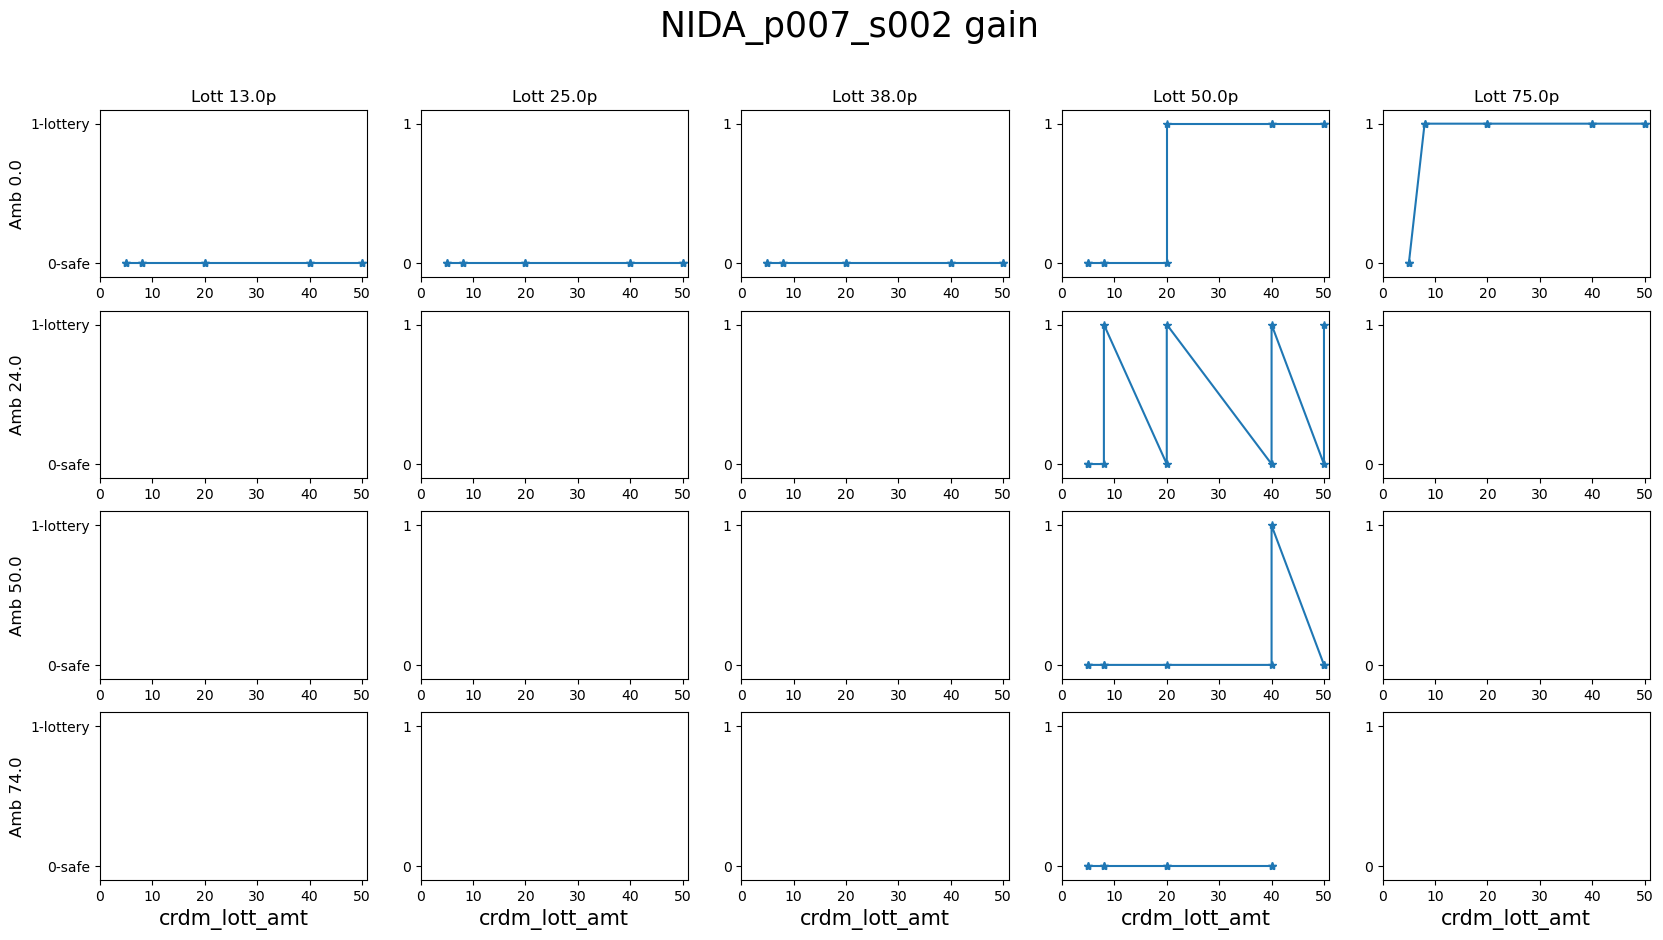

/Volumes/UCDN/datasets/NIDA/split/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm.csv
Working on this domain: loss

**WARNING** We dropped 6 of 83 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm_lottery_amt_choice_loss.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm_plot_lottery_amt_choice_loss.png


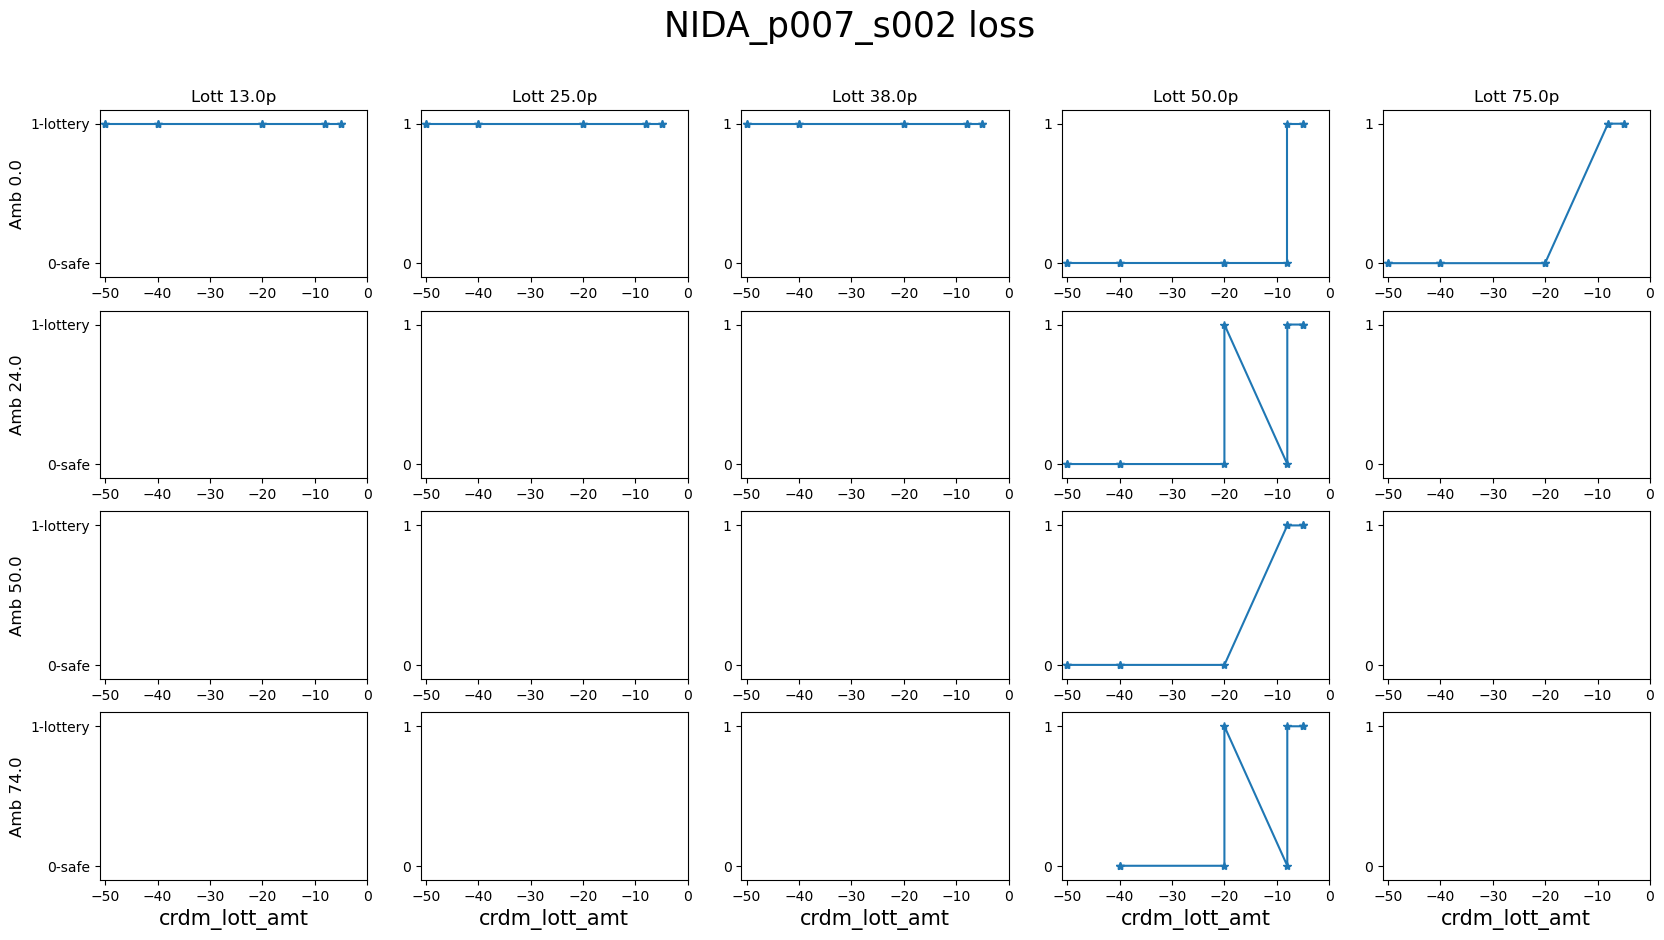

/Volumes/UCDN/datasets/NIDA/split/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm.csv

**WARNING** We dropped 15 of 169 non responses that were left blank
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm_lottery_amt_choice_combined.csv
Saving to: /Volumes/UCDN/datasets/NIDA/utility/NIDA_p007_s002/crdm/NIDA_p007_s002_crdm_plot_lottery_amt_choice_combined.png


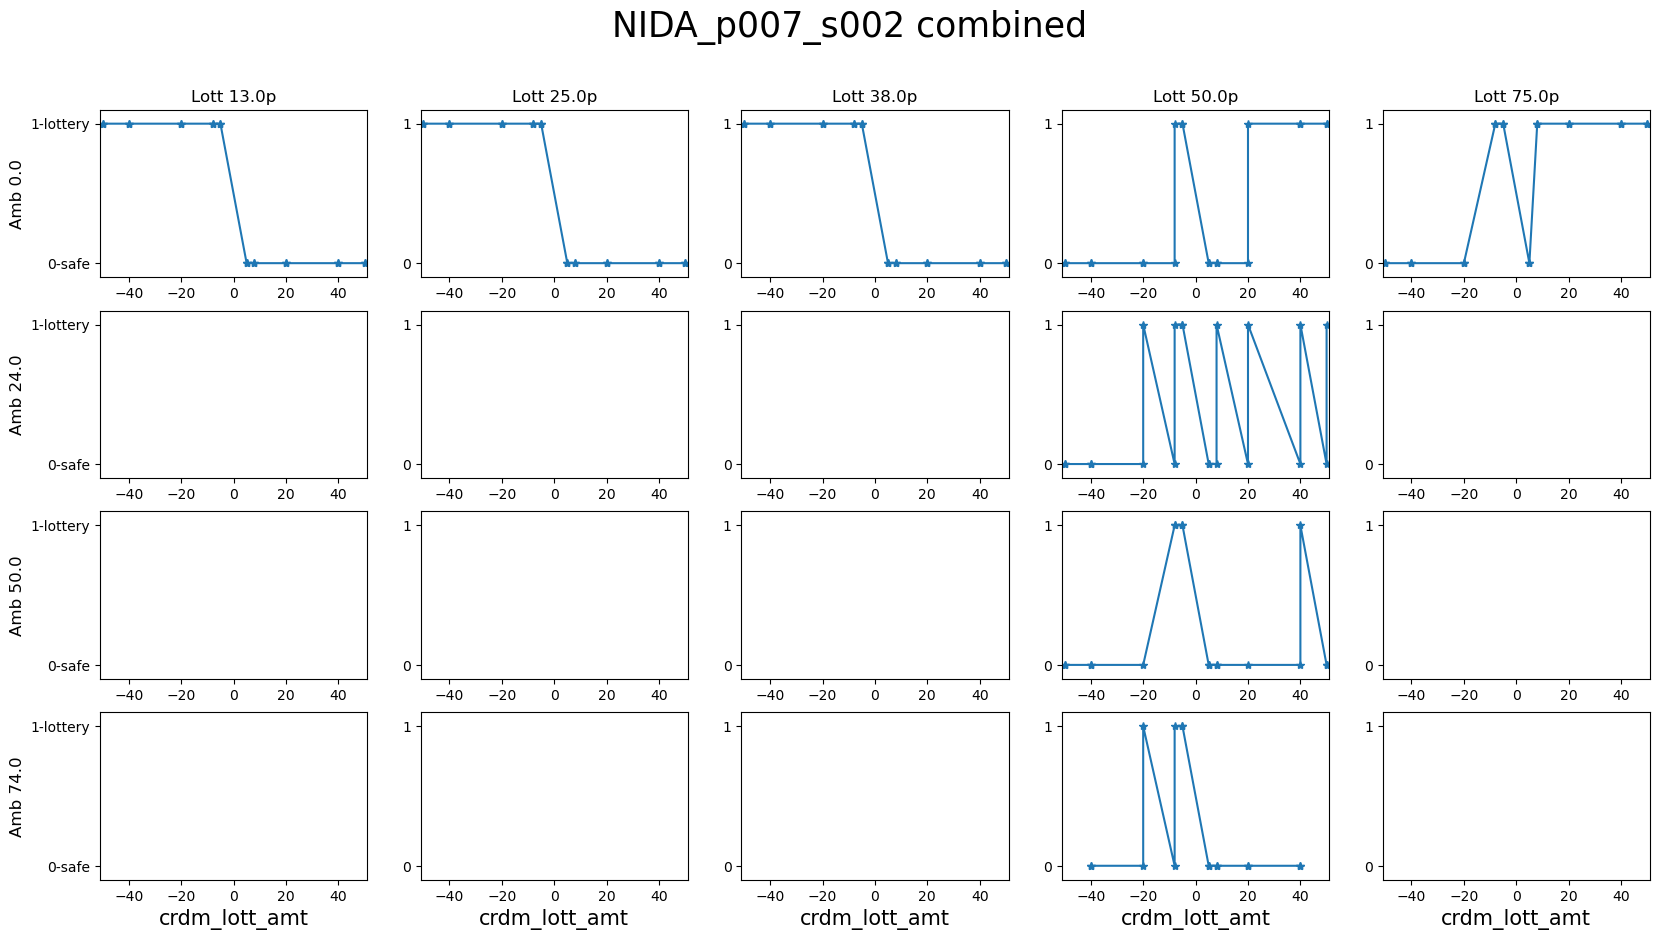

In [76]:
cols = ['crdm_amb_lev','crdm_sure_amt','crdm_lott_p','crdm_lott_amt']

# crdm_lott_p
xcol=cols[2]
# ambig lev
ycol=cols[0]

# ylabels = ['Immediate $2','Immediate $5', 'Immediate $15']
# titles = ['Delay Wait: Now', 'Delay Wait: 1 month','Delay Wait: 3 months','Delay Wait: 12 months','Delay Wait: 60 months']

xax = cols[3]
yax = 'crdm_choice'

fn_list = sorted(glob.glob(os.path.join(split_dir,'NIDA*/crdm/*.csv')))

for i, subj_fn in enumerate(fn_list):

  for domain in ['gain','loss','combined']:

    # cols defined above
    delay_amt_choice_df = pd.DataFrame(columns=['frequency','choice']+cols)

    print(subj_fn)
    df = pd.read_csv(subj_fn)
    if 'combined' not in domain:
      df = get_by_domain(df,domain=domain,task='crdm',verbose=True)
    df = drop_blank(df)

    ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
    xtitle = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']
    # ylabels = get_labels(df,col=ycol)
    # xtitle = get_labels(df,col=xcol)

    plt.figure(i,figsize=(20,10))
    xcol_vals = sorted(df[xcol].unique())
    ycol_vals = sorted(df[ycol].unique())
    index=0
    #loop through each delay-wait subgroup for each smaller sooner amount 
    for iy, yv in enumerate(ycol_vals):
      for ix, xv in enumerate(xcol_vals):
        # index = 1+iy+(len(xcol_vals)*ix)
        # print('({},{}) with ({},{}) and index: {}'.format(ix,iy,xv,yv,index))
        # print('title:{} ylabel: {}'.format(xtitle[ix],ylabels[iy]))
        index += 1
        plt.subplot(len(ycol_vals),len(xcol_vals),index)
        plt.ylim([-0.1,1.1])
        plt.xlim([df[xax].min()-1,df[xax].max()+1])
        if domain=='gain':
          plt.xlim([0,df[xax].max()+1])
        elif domain=='loss':
          plt.xlim([df[xax].min()-1,0])

        if (ix == 0):
          plt.ylabel(ylabels[iy],fontsize=12)
          plt.yticks([0,1],['0-safe','1-lottery'])
        else:
          plt.yticks([0,1])
        if (iy == 0):
          plt.title(xtitle[ix],fontsize=12)
        # if (iy < len(ycol_vals)+1):
        #   plt.xticks([])
        if (iy == len(ycol_vals)-1):
          plt.xlabel(xax,fontsize=15)
        
        x = []
        y = []
        #get dataframe with the appropriate smaller sooner and delay-wait time values
        idf = df.loc[(df[xcol] == xv) & (df[ycol] == yv)]
        if not len(idf):

          continue
        x = x + idf[xax].tolist()
        y = y + idf[yax].tolist()
        
        #used to fill .csv file for each participant's choices
        delay_amt_choice, count = count_tuples(list(zip(x,y)))
        this_df = pd.DataFrame(columns=cols)
        this_df["frequency"] = count
        this_df["choice"] = delay_amt_choice
        this_df[xcol] = xtitle[ix]
        this_df[ycol] = ylabels[iy]
        delay_amt_choice_df = pd.concat([delay_amt_choice_df,this_df],ignore_index=True)

        #sort by x and y in order to connect lines properly on final plots
        x,y = zip(*sorted(zip(x,y)))
        plt.plot(x,y,'*-')


    subj = get_subject(subj_fn)

    subj_crdm_dir = os.path.join(utility_dir,subj,'crdm')
    if not os.path.exists(subj_crdm_dir):
        print('Making subjects crdm directory : {}'.format(subj_crdm_dir))
        os.makedirs(subj_crdm_dir)

    fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_lottery_amt_choice_{}.csv'.format(subj,domain))
    print("Saving to: {}".format(fn))
    delay_amt_choice_df.to_csv(fn)
    # print(delay_amt_choice_df)
    plt.suptitle('{} {}'.format(subj,domain), fontsize=25)
    # plt.suptitle('{}: {} ${}'.format(subj,cols[3],df[cols[3]].unique().item()), fontsize=25)
    fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_lottery_amt_choice_{}.png'.format(subj,domain))
    print("Saving to: {}".format(fig_fn))
    plt.savefig(fig_fn)
    plt.show()
    #sys.exit()